In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
from pandas import Series

import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.plotly as py1
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import base64

from sklearn import preprocessing
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [2]:
stack_data = pd.read_csv('data/Stack_overflow_survey_results_public.csv')
schema = pd.read_csv('data/Stack_overflow_survey_results_schema.csv')

In [3]:
print("Size of data", stack_data.shape)

Size of data (98855, 129)


In [4]:
stack_data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [5]:
pd.options.display.max_colwidth = 300
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,Employment,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
7,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
8,CompanySize,Approximately how many people are employed by the company or organization you work for?
9,DevType,Which of the following describe you? Please select all that apply.


In [6]:
# checking missing data in stack data 
total = stack_data.isnull().sum().sort_values(ascending = False)
percent = (stack_data.isnull().sum()/stack_data.isnull().count()*100).sort_values(ascending = False)
missing_stack_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_stack_data

,Total,Percent
TimeAfterBootcamp,92203,93.270952
MilitaryUS,83074,84.036215
HackathonReasons,73164,74.011431
ErgonomicDevices,64797,65.547519
AdBlockerReasons,61110,61.817814
StackOverflowJobsRecommend,60538,61.239189
JobEmailPriorities1,52642,53.251732
JobEmailPriorities2,52642,53.251732
JobEmailPriorities3,52642,53.251732
JobEmailPriorities4,52642,53.251732


In [7]:
temp = stack_data['Hobby'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='% of Developers who codes as their hobby', hole = 0.8, color = ['#00FFFF','#CDC0B0'])

Approx. 90 % developers codes as their hobby and the reasons for others 10 % developers can be for** getting good compnay or for higher package or better college placement**.... anything can be.

In [8]:
temp = stack_data['OpenSource'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='% of Developers who contributes to open source projects', hole = 0.5, color = ['#FAEBD7','#7FFFD4'])

Approx. 56 % Developers were contributed to open source projects

In [9]:
temp = stack_data["Country"].dropna().value_counts().head(10)
temp.iplot(kind='bar', xTitle = 'Country name', yTitle = "Count", title = 'Which Country having highest number of respondents', color='#8A360F')

Out of 98,855 developers, which Country having highest number of respondents :
  * United States : 20,309 Developers
  * India : 13,721 Developers
  * Germany : 6,459 Developers
  * United Kingdom : 6,221 Developers
  * Canada : 3,393 Developers

In [10]:
temp = stack_data['Student'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='% of Developers who are students', hole = 0.6, color = ['#7FFF00','#FF6103','#8A360F'])

Approx. 74 % Developers are not students. They are working professional. Approx. 19 % Developers are full-time students and Approx. 7 % Developers are part-time students.

In [11]:
temp = stack_data['Employment'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Employment Status of Developers', hole = 0.8, color = ['#8B7355','#FF6103','#8EE5EE','#458B00','#FFF8DC','#68228B'])

**Employment Status of Developers :**
  * Employeed full-time : 74 % 
  * Independent Contractor, Freelancer or Self-employed : 9.74 %
  * Not employed but looking for work : 6.09 %
  * Employed part-time : 5.64 %
  * Not employeed and not looking for work : 4.33 %
  * Retired : 0.238 %

In [12]:
cnt_srs = stack_data["FormalEducation"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#8B7355','#BF3EFF','#FF6103','#8EE5EE','#458B00','#FFF8DC','#68228B','#1E90FF','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='highest level of formal education of Developers in %',
    margin=dict(
    l=600,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**About highest level of formal education of Developers :**
  * Approx. 46 % Developers having Bachelor's degree
  * Approx. 23 % Developers having Master's degree
  * Approx. 12 % having some college/university study without earning a degree
  * Approx. 9 % having Secondary schools(eg. American high school etc.)
  * Approx 3 % having Associate degree
  * Approx. 2 % having other doctral degree (Phd. , Ed.D etc.)
  * Approx. 2 % having Primary/elementry school
  * Approx. 2 % having Professional degree (JD, MD etc.)
  * Approx. 1 % never completed any formal education.

In [13]:
cnt_srs = stack_data["UndergradMajor"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#8B7355','#BF3EFF','#FF6103','#8EE5EE','#458B00','#FFF8DC','#68228B','#1E90FF','#FFC125','#8B8B00','#FF3E96'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='highest level of formal education of Developers in %',
    margin=dict(
    l=500,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

* **Main field of study of Developers :** Most of the Developers **(63.7 %)** having **Computer Science, Computer engineering or Software engineering** field of study followed by **8.79 %** Developers having **Another engineering discipline(ex. civil, electrical or mechanical)** followed by **8.23 %** Developers having **Information Systems, Information Tecnology or system administration**. Only Approx 1 % Developers never declared their field of study.

In [14]:
cnt_srs = stack_data["CompanySize"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#8B7355','#BF3EFF','#FF6103','#8EE5EE','#458B00','#FFF8DC','#68228B','#1E90FF','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Number of people are employed by the company or organization they work for in %',
    margin=dict(
    l=200,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Number of people are employed by the company or organization they work for :**
  * ** Approx. 10 %** people work in company or organization having **Fewer than 10 employees**.
  * ** Approx. 11 %** people work in company or organization having **10 to 19 employees**.
  * ** Approx. 24 %** people work in company or organization having **22 to 99 employees**.
  * ** Approx. 20 %** people work in company or organization having **100 to 499 employees**.
  * ** Approx. 7 %** people work in company or organization having **500 to 999 employees**.
  * ** Approx. 11 %** people work in company or organization having **1,000 to 4,999 employees**.
  * ** Approx. 4 %** people work in company or organization having **5,000 to 9,999 employees**.
  * ** Approx. 14 %** people work in company or organization having **10,000 or employees**.

In [15]:
temp1 = pd.DataFrame(stack_data['DevType'].dropna().str.split(';').tolist()).stack()
cnt_srs = temp1.value_counts().sort_values(ascending=False)
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
)

layout = dict(
    title='Description of people who participated in survey (%)',
    margin=dict(
    l=400,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Description of peoples who participated in the survey :**
  * Approx. **19 %** peoples called themselves **Back-end developers**.
  * Approx. **16 %** peoples called themselves **Full-stack developers**.
  * Approx. **13 %** peoples called themselves **Front-end developers**.
  * Approx. **7 %** peoples called themselves **Mobile developer**.
  * Approx. **6 %** peoples called themselves **Desktop or enterprise application developer**.
  * Approx. **6 %** peoples called themselves **Student**.
  * etc.

In [16]:
temp = stack_data["JobSatisfaction"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Satisfaction of peoples with their current job', hole = 0.8, color = ['#8B7355','#FFFF00','#FF6103','#8EE5EE','#458B00','#FFF8DC','#68228B'])

**Satisfaction of peoples with their current job :**
  * **37.5 %** peoples are **Moderately Satisfied**.
  * **18 %** peoples are **Extremely Satisfied**.
  * **14.5 %** peoples are **Slightly Satisfied**.
  * **10.2 %** peoples are **Slightly dissatisfied**.
  * **9.12 %** peoples are **Moderately dissatified**.
  * **7.17 %** peoples are **Neither satisfied nor dissatisfied**.
  * **3.58 %** peoples are **Extremely dissatisfied**.

In [17]:
temp = stack_data["CareerSatisfaction"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Satisfaction of peoples with their career thus far', hole = 0.8, color = ['#FFF8DC','#68228B','#1E90FF','#8B7355','#FFC125'])

**Satisfaction of peoples with their career thus far :**
  * **36.5 %** peoples are **Moderately Satisfied**.
  * **18.7 %** peoples are **Extremely Satisfied**.
  * **17.6 %** peoples are **Slightly Satisfied**.
  * **8.61 %** peoples are **Slightly dissatisfied**.
  * **8.26 %** peoples are **Neither satisfied nor dissatisfied**.
  * **6.88 %** peoples are **Moderately dissatified**.
  * **3.42 %** peoples are **Extremely dissatisfied**.

In [18]:
temp = stack_data["SurveyEasy"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "# of peoples with Difficulty of the survey in % ",
    xaxis=dict(
        title='Survey was easy or difficult',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

**People thought about difficulty of survey :**
  * Approx. **37 %** peoples think survey was **Somewhat easy**.
  * Approx. **33 %** peoples think survey was **Very easy**.
  * Approx. **23 %** peoples think survey was **Neither easy nor difficult**.
  * Approx. **6 %** peoples think survey was **Somewhat difficult**.
  * Approx. **1 %** peoples think survey was **Very difficult**.

In [19]:
cnt_srs = stack_data["SurveyTooLong"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='# of people thinking about length of the survey (%)',
    margin=dict(
    l=300,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Peoples thinking about length of the survey :**
  * Approx **50 %** peoples thinks **The survey was an appropriate length.**
  * Approx. **49 %** peoples thinks **The survey was too long**.
  * Approx. **1 %** peoples thinks **The survey was too short**.

In [20]:
temp = stack_data["YearsCoding"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FF3E96','#00E5EE','#FFF8DC','#68228B','#1E90FF','#FFC125','#FF6103','#8EE5EE','#458B00','#FFF8DC'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "for how many years have peoples been coding (%) ",
    xaxis=dict(
        title='Years',
        tickfont=dict(
            size=11,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

**for how many years have peoples been coding :**
  * 3-5 years : Approx. 25 % peoples
  * 6-8 years : Approx. 21 % peoples
  * 9-11 years : Approx. 13 % peopels
  * 0-2 years : Approx. 11 % peoples
  * etc.

In [21]:
temp = stack_data["YearsCodingProf"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FF3E96','#00E5EE','#FFF8DC','#68228B','#1E90FF','#FFC125','#FF6103','#8EE5EE','#458B00','#FFF8DC'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "for how many years have peoples been coding (%) ",
    xaxis=dict(
        title='Years',
        tickfont=dict(
            size=11,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

**For how many years have peoples coded professionally  :**
  * 0-2 years : Approx. 30 % peoples
  * 3-5 years : Approx. 27 % peoples
  * 6-8 years : Approx. 15 % peoples
  * 9-11 years : Approx. 10 % peoples
  * etc.

In [22]:
cnt_srs = stack_data["HopeFiveYears"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FF6103','#8EE5EE','#458B00','#FFF8DC' ,'#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Peoples hope to be doing in the next five years (%)',
    margin=dict(
    l=500,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Peoples hope to be doing in the next five years :**
  * ** Approx. 34 % peoples** : Working in a different or more specialized technical role than the one I'm in now.
  * **Approx. 26 % peoples ** : Working as a founder or co-founder of my own company.
  * **Approx. 19 % peoples** : Doing the same work.
  * **Approx. 10 % peoples** : Working as a product manager or project manager.
  * **Approx. 3 % peoples** : Working in a career completely unrelated to software development.
  * **Approx. 2 % peoples** : Retirement

In [23]:
cnt_srs = stack_data["JobSearchStatus"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Peoples current job-seeking status (%)',
    margin=dict(
    l=500,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Peoples current job-seeking status :**
  * **Approx 60 % peoples** : I am not actively looking, but i am open to new opportunities.
  * **Approx. 24 % peoples** :  I am not interested in new job opportunities.
  * **Approx. 16 % peoples** : I am actively looking for job.

In [24]:
cnt_srs = stack_data["LastNewJob"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FF6103','#8EE5EE','#458B00','#FFF8DC'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='When was the last time that peoples took a job with a new employer (%)',
    margin=dict(
    l=300,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**When was the last time that peoples took a job with a new employer :**
  * **Approx. 35 % peoples** : Less than a year ago.
  * **Approx. 22 % peoples** : Between 1 and 2 year ago.
  * **Approx. 19 % peoples** : More than 4 year ago.
  * **Approx. 19 % peoples** : Between 2 and 4 years ago.
  * **Approx. 6 % peoples** : I've never had a job

In [25]:
temp1 = pd.DataFrame(stack_data['CommunicationTools'].dropna().str.split(';').tolist()).stack()
temp = temp1.value_counts().sort_values(ascending=False).head(20)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Most popular communication tools (%) ",
    xaxis=dict(
        title='Tool Name',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Most popular communication tools :**
  * **Slack** used by  approx. 19 % developers.
  * ** Jira** used by approx. 15 % developers.
  * **Office / productivity suite** used by approx. 14 % developers.
  * **Stack overflow** used by only approx. 2 % developers.

In [26]:
temp1 = pd.DataFrame(stack_data['LanguageWorkedWith'].dropna().str.split(';').tolist()).stack()
temp1 = temp1.value_counts().sort_values(ascending=False).head(20)
temp2 = pd.DataFrame(stack_data['LanguageDesireNextYear'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(20)
trace1 = go.Bar(
    y=temp1.index[::-1],
    x=temp1.values[::-1],
    orientation = 'h',
    #name = ''
)
trace2 = go.Bar(
    y=temp2.index[::-1],
    x=temp2.values[::-1],
    orientation = 'h',
    #name = ''
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('On which developers worked with ', 'On which developers want to work in over the next year'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=500, width=1000, title='Most popular languages')
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* **JavaScript is the most popular language** on which developer worked and want to work in over the next year. **Python** is most demandable language on which developers want to work followed by **HTML, CSS** and **SQL** etc

In [27]:
temp1 = pd.DataFrame(stack_data['DatabaseWorkedWith'].dropna().str.split(';').tolist()).stack()
temp1 = temp1.value_counts().sort_values(ascending=False).head(20)
temp2 = pd.DataFrame(stack_data['DatabaseDesireNextYear'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(20)
trace1 = go.Bar(
    y=temp1.index[::-1],
    x=temp1.values[::-1],
    orientation = 'h',
    marker=dict(
        color=temp2.values[::-1],
        colorscale = 'red',
#         reversescale = True
    ),
    #name = ''
)
trace2 = go.Bar(
    y=temp2.index[::-1],
    x=temp2.values[::-1],
    orientation = 'h',
    #name = ''
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('On which developers worked with ', 'On which developers want to work in over the next year '))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
                          
fig['layout'].update(height=500, width=1100, title='Most popular Databases', margin=dict(l=285,))
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* **MySQL is the most popular Database** on which developer worked and want to work in over the next year. **MongoDB** is most demandable Database on which developers want to work followed by **PostgreSQL, SQLServer, redis** and **ElasticsSearch** etc.

In [28]:
temp1 = pd.DataFrame(stack_data['PlatformWorkedWith'].dropna().str.split(';').tolist()).stack()
temp1 = temp1.value_counts().sort_values(ascending=False).head(20)
temp2 = pd.DataFrame(stack_data['PlatformDesireNextYear'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(20)
trace1 = go.Bar(
    y=temp1.index[::-1],
    x=temp1.values[::-1],
    orientation = 'h',
    #name = ''
)
trace2 = go.Bar(
    y=temp2.index[::-1],
    x=temp2.values[::-1],
    orientation = 'h',
    #name = ''
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('On which developers worked with ', 'On which developers want to work in over the next year'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
                          
fig['layout'].update(height=500, width=1100, title='Most popular platforms', margin=dict(l=250,))
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* **Linux is the most popular platform** on which developer worked and want to work in over the next year followed by  **Android** is most demandable Database on which developers want to work followed by **AWS, Raspberry pie** etc.

In [29]:
temp1 = pd.DataFrame(stack_data['FrameworkWorkedWith'].dropna().str.split(';').tolist()).stack()
temp1 = temp1.value_counts().sort_values(ascending=False).head(20)
temp2 = pd.DataFrame(stack_data['FrameworkDesireNextYear'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(20)
trace1 = go.Bar(
    y=temp1.index[::-1],
    x=temp1.values[::-1],
    orientation = 'h',
    marker=dict(
        color=temp2.values[::-1],
        colorscale = 'red',
#         reversescale = True
    ),
    #name = ''
)
trace2 = go.Bar(
    y=temp2.index[::-1],
    x=temp2.values[::-1],
    orientation = 'h',
    #name = ''
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('On which developers worked with', 'On which developers want to work in over the next year'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
                          
fig['layout'].update(height=500, width=1100, title='Most popular Frameworks', margin=dict(l=100,))
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* **Node.js, Angular, React and .Net core are the most popular frameworks** on which developer worked and want to work in over the next year followed by  **Tansorflow** is most demandable Database on which developers want to work.

In [30]:
temp = stack_data['StackOverflowRecommend'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='StackOverflow Recommendation', hole = 0.8,)

* ** 69 % peoples** want to recommend StackOverflow **very likely** and **only 0.35 %** peoples **don't **want to recommend stackoverflow.

In [31]:
temp = stack_data['StackOverflowVisit'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Peoples visiting StackOverflow', hole = 0.6, color =['#FAEBD7','#00FFFF','#458B74','#C1FFC1','#7FFF00','#FF7F24'])

**Peoples visiting StackOverflow :**
  * **32.5 % peoples said** : Daily or almost daily
  * **31.1 % peoples said** : multiple times per day
  * **22.4 % peoples said** : A few times per week
  * **11.5 % peoples said** : A few times per month or weekly

In [32]:
temp = stack_data['StackOverflowHasAccount'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Has StackOverflow account', hole = 0.6, color =['#FAEBD7','#00FFFF','#458B74'])

**Respondents having StackOverflow account :**
  * **87.4 % Respondents said** : Yes
  * **8.73 % Respondents said **: No
  * **3.8 % Respondents said **: I'm not sure / I can't remember

In [33]:
cnt_srs = stack_data["StackOverflowParticipate"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125','#C1FFC1','#7FFF00','#FF7F24'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Participation on StackOverflow (%)',
    margin=dict(
    l=400,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Participation on StackOverflow in Q&A :**
  * **Approx. 39 % Respondents said** : Less than once per month or monthly
  * **Approx. 23 % Respondents said** : A few times per month or weekly
  * **Approx. 17 % Respondents said** : I have never participated in Q&A on StackOverflow
  * **Approx. 12 % Respondents said** : A few times per week
  * **Approx. 6 % Respondents said** : Daily or almost daily
  * **Approx. 3 % Respondents said** : Multiple times per day

In [34]:
temp = stack_data['StackOverflowJobs'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Number of peoples visited StackOverflow jobs board', hole = 0.6, color =['#1E90FF','#FFC125','#C1FFC1'])

**Number of peoples visited StackOverflow jobs board :**
  * **51.4 % Respondents said** : YES
  * **35.8 % Respondents said** : No, I knew that StackOverflow had a jobs board but had never visit or used
  * **12.8 % Respondents said** : No, I didn't know that StackOverflow had a jobs board

In [35]:
cnt_srs = stack_data["StackOverflowDevStory"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125','#C1FFC1','#7FFF00','#FF7F24'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Up-to-date developer story on StackOverflow (%)',
    margin=dict(
    l=300,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Up-to-date developer story on StackOverflow :**
  * **Approx. 37 % Respondents said** : No, I don't know what that is
  * **Approx. 24 % Respondents said** : No, I know what it is but i don't have one
  * **Approx. 23 % Respondents said** :  No, I have one but it's out of date
  * **Approx. 17 % Respondents said** : YES

In [36]:
temp = stack_data['StackOverflowJobsRecommend'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='StackOverflow Jobs Board Recommendation', hole = 0.7, color =['#1E90FF','#FFC125','#C1FFC1','#8B7355','#BF3EFF','#FF6103','#FFF8DC','#68228B','#FF1493','#8B0A50'])

**26.5 %** respondents said we will recommend StackOverflow jobs board **very likely**. **3.23 % **respondents said we **will not** recommend StackOverflow jobs board to anyone.

In [37]:
temp = stack_data['StackOverflowConsiderMember'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Members of the Stack Overflow community', hole = 0.7, color =['#1E90FF','#FFC125','#C1FFC1',])

**Members of the Stack Overflow community :**
  * **55.5 % Respondents said** : YES
  * **22.4 % Respondents said** : NO
  * **22.2 % Respondents said** : I'm not sure

In [38]:
so_comm = stack_data[stack_data['StackOverflowConsiderMember'] == 'Yes']

In [39]:
temp1 = so_comm.set_index('Gender').DevType.str.split(';', expand=True).stack().reset_index('Gender')
temp1.columns = ['Gender','job']
temp = temp1['job'].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(temp1["Gender"][temp1["job"] == val] == 'Male'))
    temp_y0.append(np.sum(temp1["Gender"][temp1["job"] == val] == 'Female'))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='Male'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Top DevType who consider themselves part of the Stack Overflow community (%)",
    barmode='stack',
    width = 1000,
    xaxis=dict(
        title='DevType',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

The hypotherical tools are : 
  * ht1 : A peer mentoring system
  * ht2 : A private area for people new to programming
  * ht3 : A programming-oriented blog platform
  * ht4 : An employer or job review system
  * ht5 : An area for Q&A related to career growth
  
where **1 is not at all interested** and **5 is extremely interested**.So, here i will take sum of individual columns(ht1, ht2,...etc) . So, finally i will rank them in a order of most participated tools.** Less the value** of a column means **less participated tool** and **higher the value** means **most participated tool**.

In [40]:
print('ht1 sum', stack_data['HypotheticalTools1'].map({'Not at all interested' : 1, 'A little bit interested' : 2,'Somewhat interested' : 3, 'Very interested' : 4, 'Extremely interested' : 5}).sum())
print('ht2 sum', stack_data['HypotheticalTools2'].map({'Not at all interested' : 1, 'A little bit interested' : 2,'Somewhat interested' : 3, 'Very interested' : 4, 'Extremely interested' : 5}).sum())
print('ht3 sum', stack_data['HypotheticalTools3'].map({'Not at all interested' : 1, 'A little bit interested' : 2,'Somewhat interested' : 3, 'Very interested' : 4, 'Extremely interested' : 5}).sum())
print('ht4 sum', stack_data['HypotheticalTools4'].map({'Not at all interested' : 1, 'A little bit interested' : 2,'Somewhat interested' : 3, 'Very interested' : 4, 'Extremely interested' : 5}).sum())
print('ht5 sum', stack_data['HypotheticalTools5'].map({'Not at all interested' : 1, 'A little bit interested' : 2,'Somewhat interested' : 3, 'Very interested' : 4, 'Extremely interested' : 5}).sum())


ht1 sum 196598.0
ht2 sum 184402.0
ht3 sum 207334.0
ht4 sum 224089.0
ht5 sum 223204.0


**Interest of developers in participating in the  hypothetical tools on Stack Overflow :**
  * **Rank 1 :** An employer or job review system **(Most participated tool)**
  * **Rank 2 :** An area for Q&A related to career growth
  * **Rank 3 :** A programming-oriented blog platform
  * **Rank 4 :** A peer mentoring system
  * **Rank 5 :** A private area for people new to programming **(Less participated tool)**

In [41]:
temp = stack_data[['StackOverflowVisit', 'StackOverflowRecommend']]
temp.columns = ['StackOverflowVisit', 'StackOverflowRecommend']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(temp['StackOverflowVisit'], temp['StackOverflowRecommend']).style.background_gradient(cmap = cm)

StackOverflowRecommend,0 (Not Likely),1,10 (Very Likely),2,3,4,5,6,7,8,9
StackOverflowVisit,,,,,,,,,,,
A few times per month or weekly,50,23,4185,66,95,84,360,378,999,1458,1065
A few times per week,51,22,10298,31,61,91,288,381,1205,2373,2281
Daily or almost daily,39,18,17931,28,38,54,196,292,938,2318,3004
I have never visited Stack Overflow (before today),44,16,114,12,15,9,56,29,45,39,32
Less than once per month or monthly,54,33,515,35,53,47,141,107,213,216,135
Multiple times per day,29,10,19726,18,32,25,133,130,484,1254,1923


* Majority of peoples who visit Stackoverflow **Multiple times per day**, **Daily or almost daily**, **A few times per week** or **A few times per month or weekly**	 recommending **very likely(10)**.

In [42]:
temp = stack_data[['StackOverflowVisit', 'StackOverflowParticipate']]
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(temp['StackOverflowVisit'], temp['StackOverflowParticipate']).style.background_gradient(cmap = cm)

StackOverflowParticipate,A few times per month or weekly,A few times per week,Daily or almost daily,I have never participated in Q&A on Stack Overflow,Less than once per month or monthly,Multiple times per day
StackOverflowVisit,,,,,,
A few times per month or weekly,1312,75,13,1589,3876,7
A few times per week,3532,1199,51,2758,6628,8
Daily or almost daily,5591,3158,1401,3495,8135,132
Less than once per month or monthly,52,9,2,348,699,3
Multiple times per day,4351,3207,2430,3176,6411,1972


In [43]:
temp = stack_data[['StackOverflowVisit', 'StackOverflowJobs']]
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(temp['StackOverflowVisit'], temp['StackOverflowJobs']).style.background_gradient(cmap = cm)

StackOverflowJobs,"No, I didn't know that Stack Overflow had a jobs board","No, I knew that Stack Overflow had a jobs board but have never used or visited it",Yes
StackOverflowVisit,,,
A few times per month or weekly,1847,3397,3399
A few times per week,2592,6568,7740
Daily or almost daily,2487,8646,13418
Less than once per month or monthly,508,526,484
Multiple times per day,2118,7782,13609


* Most of the peoples who are visiting stackOverflow **Daily or almost daily**	or **Multiple times per day** they know about **StackOverflow job board**.

In [44]:
temp = stack_data[['StackOverflowVisit', 'StackOverflowDevStory']]
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(temp['StackOverflowVisit'], temp['StackOverflowDevStory']).style.background_gradient(cmap = cm)

StackOverflowDevStory,"No, I have one but it's out of date","No, I know what it is but I don't have one","No, and I don't know what that is",Yes
StackOverflowVisit,,,,
A few times per month or weekly,1345,1593,3221,703
A few times per week,3124,3422,5818,1801
Daily or almost daily,5261,5350,7483,3808
Less than once per month or monthly,179,227,603,101
Multiple times per day,5200,4950,6866,4517


* Highest number of peoples who are visiting StackOverflow **Daily or almost dail**y, **Multiple times per day** or **A few times per week	**, they don't know what is **Stackoverflow developer Story**

In [45]:
temp = stack_data[['StackOverflowJobs', 'StackOverflowJobsRecommend']]
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(temp['StackOverflowJobs'], temp['StackOverflowJobsRecommend']).style.background_gradient(cmap = cm)

StackOverflowJobsRecommend,0 (Not Likely),1,10 (Very Likely),2,3,4,5,6,7,8,9
StackOverflowJobs,,,,,,,,,,,
Yes,1236,375,10137,1047,1315,1162,5963,3782,5429,5194,2677


* Its good to see that who are visiting stackoverflow job board, out of these most of the peoples are recommending Stackoverflow job board very likely(10).

In [46]:
cnt_srs = stack_data["UpdateCV"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#BF3EFF','#FFF8DC','#68228B','#1E90FF','#FFC125','#C1FFC1','#7FFF00','#FF7F24'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Reasons of upadating a CV  (%)',
    margin=dict(
    l=450,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Top Reasons of upadating a CV  :**
  * **Approx. 42 % Respondents said** : My job status and my personal status changed.
  * **Approx. 14 % Respondents said** : A recruiter contacted me.
  * **Approx. 11 % Respondents said** : I had a negative experience or interaction at work.
  * **Approx. 11 % Respondents said** : A friend told me about a job opportunity.
  * **Approx. 10 % Respondents said** : I saw an employer's advertisement.

In [47]:
temp = pd.DataFrame(stack_data['EducationTypes'].dropna().str.split(';').tolist()).stack()
cnt_srs =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FF1493','#00BFFF','#FCE6C9','#1E90FF','#FFC125','#FFD700','#C1FFC1','#7FFF00','#FF7F24'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Types of Non-degree education in which people participated (%)',
    margin=dict(
    l=550,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Types of Non-degree education in which people participated :**
  * **Approx. 29 % Respondents said** : Taught yourself a new language, framework or tool without taking a formal course.
  * **Approx. 16 % Respondents said** : Taken an online course in programming and software developement(eg. a MOOC)
  * **Approx. 14 % Respondents said** : Contributed to open source softwares
  * **Approx. 12 % Respondents said** : Received on-the-job training in software developement
  * **Approx. 9 % Respondents said** : Participated in hackathon
  * **Approx. 8 % Respondents said** : Participated in online coding compitition(eg. HackerRank, CodeChef or TopCoder)
  * **Approx. 6 % Respondents said** : Taken a part-time in-person course in programming or software development
  * **Approx. 5 % Respondents said** : Completed an industry certification program(eg. MCPD)
  * **Approx. 4 % Respondents said** :  Participated in a full-time developer training program or bootcamp

In [48]:
temp = pd.DataFrame(stack_data['SelfTaughtTypes'].dropna().str.split(';').tolist()).stack()
cnt_srs =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FFD700','#C1FFC1','#7FFF00','#FF7F24','#FF1493','#00BFFF','#FCE6C9','#1E90FF','#FFC125',],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Top resources used by peoples who taught yourself without taking a course (%)',
    margin=dict(
    l=610,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Top resources used by peoples who taught yourself without taking a course :**
  * **Approx. 22 % Respondents said** : The official documentation and/or standards for the technology
  * **Approx. 22 % Respondents said** : Q&A on the StackOverflow
  * **Approx. 13 % Respondents said** : A book or e-book from o'Reilly, Apress or a similar publisher
  * **Approx. 13 % Respondents said** : Online developer communities other than StackOverflow(eg, forums, listservs, IRC Channels etc)
  * **Approx. 13 % Respondents said** :The technology's online help system
  * **Approx. 5 % Respondents said** : A college/University computer  science or software engineering books

In [49]:
temp = pd.DataFrame(stack_data['HackathonReasons'].dropna().str.split(';').tolist()).stack()
cnt_srs =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FFD700','#C1FFC1','#FCE6C9','#1E90FF','#FFC125','#7FFF00','#FF7F24','#FF1493','#00BFFF'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Top reasons who participated in online coding compitition or hackathon (%)',
    margin=dict(
    l=610,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Top reasons who participated in online coding compitition or hackathon :**
  * **Approx. 26 % Respondents said** : Because I find it enjoyable
  * **Approx. 23 % Respondents said** : To improve my general technical skills or programming ability
  * **Approx. 18 % Respondents said** : To improve my knowledge of a specific programming language , framework or technology
  * **Approx. 10 % Respondents said** : To improve my ability to work on a team with others programmers
  * **Approx. 9 % Respondents said** : To build my professional network
  * **Approx. 7 % Respondents said** : To help me find a new job opportunities
  * **Approx. 6 % Respondents said** : to win prizes or cash awards

In [50]:
temp = stack_data['EthicsChoice'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='What peoples think about writing a code that is extremely unethical ?', hole = 0.5, color = ['#FAEBD7','#7FFFD4','#1E90FF'])

**What peoples think about writing a code that is extremely unethical ? **
  * **58.5 % Respondents said** : NO
  * **36.6 % Respondents said** : Depend on what it is
  * **4.82 % Respondents said** : YES

In [51]:
temp = stack_data['EthicsReport'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Do peoples want to report out unethical code in question ?', hole = 0.5, color = ['#8EE5EE','#458B00','#FFF8DC','#1E90FF'])

**Do peoples want to report out unethical code in question ?**
  * **46.6 % Respondents said** : Depends on what it is
  * **35.7 % Respondents said** : Yes, but only within the company
  * **13.1 % Respondents said** : Yes, and publicaly
  * **4.62 % Respondents said** : No

In [52]:
temp = stack_data['EthicsResponsible'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='who is most responsible for code that accomplishes something unethical?', hole = 0.5, color = ['#458B00','#FFF8DC','#1E90FF'])

**What peoples think who is most responsible for code that accomplishes something unethical?**
  * **57.5 % Respondents said** : Upper management at the company/organization
  * **22.8 % Respondents said** : The person who came up with idea 
  * **19.7 % Respondents said** : The developer who wrote it 

In [53]:
temp = stack_data['EthicalImplications'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='There can be obligation to consider the ethical implications of the code that you write?', hole = 0.5, color = ['#FF6103','#8EE5EE','#458B00'])

**There can be obligation to consider the ethical implications of the code that you write? **
  * **79.6 % Respondents said** : YES
  * **14.3 % Respondents said** : Unsure/I don't know
  * **6.08% Respondents said** : NO

In [54]:
temp = pd.DataFrame(stack_data['IDE'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125','#FF6103','#8EE5EE','#458B00','#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Top most used IDE  by the developers (%) ",
    xaxis=dict(
        title='IDE Name',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Top most used IDE  by the developers :**
  * Approx. **12 %** developers using **Visual Studio Code**
  * Approx. **12 %** developers using Visual Studio 
  * Approx. **11 %** developers using **Notepad++**
  * Approx. **10 %** developers using **Sublime Text**
  * Approx. **9 %** developers using **Vim**

In [55]:
temp = pd.DataFrame(stack_data['OperatingSystem'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Top Used Operating system by the developers (%) ",
    xaxis=dict(
        title='Operating System',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Top Used Operating system by the developers :**
  * Approx. **50 %** developers are using **Windows**
  * Approx. **27 % **developers are using **MacOS**
  * Approx. **23 %** developers are using **Linux-based**
  * **Only  0.2 %** developers are using **BSD/Unix**

In [56]:
temp = pd.DataFrame(stack_data['VersionControl'].dropna().str.split(';').tolist()).stack()
cnt_srs =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#8B7355','#BF3EFF','#FF6103','#FFC125','#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Top version control system developers regularly use (%)',
    margin=dict(
    l=300,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Top version control system developers regularly use :**
  * Approx. **63 %** developers are using **Git**(**Most popular version control system**)
  * Approx. **12 %** developers are using **Subversion**
  * Approx. **8 %** developers are using **Team Foundation Version Control**
  * Approx **6 %** deveopers are using **Zip file back-ups**

In [57]:
temp = pd.DataFrame(stack_data['Methodology'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125','#FF6103','#8EE5EE','#458B00','#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Top methodologies developers have experience working in (%) ",
    xaxis=dict(
        title='Methodology',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Top methodologies developers have experience working in :**
  * Approx. **33 %** developers experience in **Agile**
  * Approx. **24 %** developers experience in **Scrum**
  * Approx. **14 %** developers experience in **Kanban**
  * Approx. **11 %** developers experience in **Pair programming**

In [58]:
temp = stack_data['WakeTime'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Developers wake up time on working days', hole = 0.5, color = ['#8EE5EE','#458B00','#1E90FF','#030303','#FFC125','#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125'])

**Developers wake up time on working days :**
  * **29.5 %** developers wake up time : **Between 7 am to 8 am**
  * **28.2 %** developers wake up time : **Between 6 am to 7 am**
  * **14.7 %** developers wake up time : **Between 8 am to 9 am**
  * **12.4 %** developers wake up time : **Between 5 am to 6 am**
  * etc.

In [59]:
temp = stack_data['HoursComputer'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Developers spend their time in front of desktop or computer on a typical day', hole = 0.5, color = ['#FFC125','#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125'])

**Developers spend their time in front of desktop or computer  on a typical day:**
  * **52.7 %** developers : **9-12 hours**
  * **30.6 %** developers : **5-8 hours**
  * **13.2 %** developers : **Over 12 hours**
  * **3.26 %** developers :** 1-4 hours**
  * **0.25 %** developers : **Less than 1 hour**

In [60]:
temp = stack_data['HoursOutside'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Developers spend their time outside on a typical day', hole = 0.5, color = ['#BF3EFF','#FF6103','#FFC125','#FFF8DC','#8B7355',])

**Developers spend their time outside on a typical day :**
  * **38.6 %** developers : **1-2 hours**
  * **33.3 %** developers : **30-59 minutes**
  * **15.6 %** developers : **Less than 30 minutes**
  * **9.98 %** developers :** 3-4 hours**
  * **2.53 %** developers : **Over 4 hour**

In [61]:
temp = stack_data['SkipMeals'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='In a typical week, how many times Developers skip a meal in order to be more productive?', hole = 0.5, color = ['#BF3EFF','#FF6103','#FFC125','#FFF8DC','#8B7355',])

**In a typical week, how many times Developers skip a meal in order to be more productive? **
  * **63.6 %** developers : **Never**
  * **25.2 %** developers : **1 - 2 times per week**
  * **5.98 %** developers : **3 - 4 times per week**
  * **5.15 %** developers : **Daily or almost every day**

In [62]:
temp = pd.DataFrame(stack_data['ErgonomicDevices'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125',],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Top ergonomic furniture or devices developers use on a regular basis (%) ",
    xaxis=dict(
        title='Ergonomic furniture or device',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Top ergonomic furniture or devices developers use on a regular basis :**
  * **Approx. 38 %** developers use : **Ergonomic Keyboard or mouse**
  * **Approx. 37 %** developers use : **Standing desk**
  * **Approx. 16 %** developers use : **Wrist/hand supports or braces**
  * **Approx. 9 %** developers use : **Fatigue-relieving floor mat**

In [63]:
temp = pd.DataFrame(stack_data['Exercise'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#BF3EFF','#FF6103','#FFC125','#FFF8DC','#8B7355'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "In a typical week, how many times do developers exercise? (%) ",
    xaxis=dict(
        title='Number of times',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**In a typical week, how many times do developers exercise? **
  * **Approx. 38 %** developers said : **I don't typically excercise**
  * **Approx. 29 %** developers said : **1 - 2 times per week**
  * **Approx. 20 %** developers said : **3 - 4 times per week**
  * **Approx. 14 %** developers said : **Daily or almost every day**

In [64]:
temp = pd.DataFrame(stack_data['Age'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#68228B','#1E90FF','#FFC125','#BF3EFF','#FF6103','#FFC125','#FFF8DC','#8B7355'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Age of the developers of participated in the survey (%) ",
    xaxis=dict(
        title='Age of the developers',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Age of the developers of participated in the survey :**
  * **Apprx. 49 %** developers : **25 - 34 years old**
  * **Apprx. 24 %** developers : **18- 24 years old**
  * ** Apprx. 18 %** developers : **35 - 44 years old**
  * **Apprx. 5 %** developers : **45 - 54 years old**
  * **Apprx. 3 %** developers : **under 18 years old**
  * **Apprx. 1 %** developers : **55 - 64 years old**
  * **Apprx. 0.2 %** developers : **65 years or older**

In [65]:
temp = stack_data["NumberMonitors"].dropna().value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Number of monitors are set up at developers workstation', hole = 0.5, color = ['#BF3EFF','#FF6103','#FFC125','#FFF8DC','#8B7355',])

**Most **of the developers having **2 monitor** at their workstation followed by **1 monitor**.

In [66]:
temp = stack_data["CheckInCode"].dropna().value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Over the last year, how often have developers checked-in or committed code?', hole = 0.5, color = ['#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125','#0000FF'])

**Over the last year, how often have developers checked-in or committed code? **
  * ** 60. 2 % developers :** Multiples times per day **(This is interesting)**
  * ** 19.1 % developers :** Few times per week
  * ** 9.1 % developers : **Once a day
  * ** 6.89 % developers :** Weekly or few times per month
  * ** 3.23 % developers :** Less than once per month
  * ** Only 1.48 % developers :** Never

In [67]:
temp = pd.DataFrame(stack_data['Gender'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Gender', hole = 0.5, color = ['#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125','#0000FF'])

**Gender Analysis who participated in the survey :**
  * 91.7 % developers : **Male**
  * 6.76 % developers : **Female**
  * 0.91 % developers : **Non-binary, genderqueer or gender non-conforming**
  * 0.65 % developers : **Transgender**

In [68]:
temp = pd.DataFrame(stack_data['SexualOrientation'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Sexual Orientation', hole = 0.5, color = ['#FF6103','#FFC125','#0000FF','#FFF8DC','#8B7355','#BF3EFF',])

**Sexual Orientation of developers :**
  * 91.6 % developers : **Straight or heterosexual**
  * 4.21 % developers : **Bisexual or Queer**
  * 2.31 % developers : **Gay or Lesbian**
  * 1.86 % developers : **A sexual**

In [69]:
temp = stack_data["Exercise"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(stack_data["Gender"][stack_data["Exercise"]==val] == 'Male'))
    temp_y0.append(np.sum(stack_data["Gender"][stack_data["Exercise"]==val] == 'Female'))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='Male'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Number of times developers excercise(Male V.S. Female) (%)",
    barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Number of times',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [70]:
temp = stack_data["Age"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(stack_data["Gender"][stack_data["Age"]==val] == 'Male'))
    temp_y0.append(np.sum(stack_data["Gender"][stack_data["Age"]==val] == 'Female'))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='Male'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Age of the developers who participated in the survey(Male V.S. Female) (%)",
    barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Age',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [71]:
temp = stack_data["FormalEducation"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(stack_data["Gender"][stack_data["FormalEducation"]==val] == 'Male'))
    temp_y0.append(np.sum(stack_data["Gender"][stack_data["FormalEducation"]==val] == 'Female'))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='Male'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Fromal Education of developers(Male V.S. Female) (%)",
    barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Fromal Education of developers',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [72]:
temp = stack_data.set_index(['ConvertedSalary','Gender']).DevType.str.split(';', expand=True).stack().reset_index(['ConvertedSalary','Gender'])
temp.columns = ['ConvertedSalary','Gender','job']
temp = temp.set_index(['ConvertedSalary','job']).Gender.str.split(';', expand=True).stack().reset_index(['ConvertedSalary','job'])
temp.columns = ['MedianSalary','job','Gender']
temp = temp.groupby(['Gender','job'])['MedianSalary'].median().sort_values(ascending = False).reset_index()
temp1 = temp[temp.Gender == 'Male']
temp2 = temp[temp.Gender == 'Female']
trace1 = go.Bar(
    x = temp1.job,
    y = temp1.MedianSalary,
    name='Male'
)
trace2 = go.Bar(
    x = temp2.job,
    y = temp2.MedianSalary,
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Top DevType with Median Salary(Male V.S. Female)",
    barmode='stack',
    width = 1000,
    xaxis=dict(
        title='DevType',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Median Salary ($)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Top DevType with Median Salary(Male V.S. Female) : **
  * Female having more median salary than Male in these DevType :
    * **DevOps specialist**
    * **C-suite executive (CEO, CTO etc.)**
    * **Full Stack developer**
    * **Educator or acadmic research**

In [73]:
temp = stack_data.groupby('Country').count().reset_index()
respondent_less_than_500 = list(temp[temp['Respondent']<=500]['Country'])
def func(x):
    if x not in respondent_less_than_500:
        return True
    return False
copy = stack_data[stack_data['Country'].apply(func)]
temp = copy.set_index(['ConvertedSalary','Gender']).Country.str.split(';', expand=True).stack().reset_index(['ConvertedSalary','Gender'])
temp.columns = ['ConvertedSalary','Gender','Country']
temp = temp.set_index(['ConvertedSalary','Country']).Gender.str.split(';', expand=True).stack().reset_index(['ConvertedSalary','Country'])
temp.columns = ['MedianSalary','Country','Gender']
temp = temp.groupby(['Gender','Country'])['MedianSalary'].median().sort_values(ascending = False).reset_index()
#temp.head()
temp1 = temp[temp.Gender == 'Male']
temp2 = temp[temp.Gender == 'Female']
trace1 = go.Bar(
    x = temp1.Country,
    y = temp1.MedianSalary,
    name='Male'
)
trace2 = go.Bar(
    x = temp2.Country,
    y = temp2.MedianSalary,
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Top Countries where respondents are > 500 with Median Salary(Male V.S. Female)",
    barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Country Name',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Median Salary ($)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Top Countries where respondents are > 500 with Median Salary(Male V.S. Female) :**
  * Female having more median salary than Male : **China**
  * Female and Male having equal median salary : **Brazil**

In [74]:
print("Overall Developers Annual Salary\n",stack_data['ConvertedSalary'].dropna().describe())
print("Male Developers Annual Salary\n",stack_data[stack_data.Gender == 'Male']['ConvertedSalary'].dropna().describe())
print("Female Developers Annual Salary\n",stack_data[stack_data.Gender == 'Female']['ConvertedSalary'].dropna().describe())
print("Overall Developers Annual Median Salary\n",stack_data['ConvertedSalary'].dropna().median())
print("Male Developers Annual Median Salary\n",stack_data[stack_data.Gender == 'Male']['ConvertedSalary'].dropna().median())
print("Female Developers Annual Median Salary\n",stack_data[stack_data.Gender == 'Female']['ConvertedSalary'].dropna().median())

Overall Developers Annual Salary
 count    4.770200e+04
mean     9.578086e+04
std      2.023482e+05
min      0.000000e+00
25%      2.384400e+04
50%      5.507500e+04
75%      9.300000e+04
max      2.000000e+06
Name: ConvertedSalary, dtype: float64
Male Developers Annual Salary
 count    4.123200e+04
mean     9.647707e+04
std      2.012426e+05
min      0.000000e+00
25%      2.497200e+04
50%      5.610000e+04
75%      9.484200e+04
max      2.000000e+06
Name: ConvertedSalary, dtype: float64
Female Developers Annual Salary
 count    2.649000e+03
mean     8.825129e+04
std      1.885779e+05
min      0.000000e+00
25%      2.380800e+04
50%      5.433600e+04
75%      8.500000e+04
max      2.000000e+06
Name: ConvertedSalary, dtype: float64
Overall Developers Annual Median Salary
 55075.0
Male Developers Annual Median Salary
 56100.0
Female Developers Annual Median Salary
 54336.0


**Developers Annual Salary :** 
  * **Overall Developers Annual Salary :**  **Minimum Salary =** \$ 0,  **Maximum Salary =**  \$ 20,00,000, **Mean Salary =** \$ 95,780.86, **Median Salary =** \$ 55,075 
  * **Male Developers Annual Salary :**  **Minimum Salary =** \$ 0,  **Maximum Salary =**  \$ 20,00,000, **Mean Salary =** \$ 96,477.07 , **Median Salary =** \$ 56,100 
  * **Female Developers Annual Salary :**  **Minimum Salary =** \$ 0,  **Maximum Salary =**  \$ 20,00,000, **Mean Salary =** \$ 88,251.29, **Median Salary =** \$ 54,336 

  

In [75]:
temp = stack_data.groupby('Country').count().reset_index()
respondent_less_than_500 = list(temp[temp['Respondent']<=500]['Country'])
def func(x):
    if x not in respondent_less_than_500:
        return True
    return False
copy = stack_data[stack_data['Country'].apply(func)]
#copy['Country'].head()
temp = copy[['Country','ConvertedSalary']].groupby('Country')['ConvertedSalary'].median().sort_values(ascending = False)
temp1 = temp.head(20)
#print(temp)
temp1.iplot(kind='bar', xTitle = 'Country name', yTitle = "Median Salary ($)", title = 'Top countries where respondents are > 500 with highest Median Salary in USD ', color='green')

In [76]:
temp = copy[['Country','ConvertedSalary']].groupby('Country')['ConvertedSalary'].median().sort_values(ascending = False)
data = [dict(
        type='choropleth',
        locations= temp.index,
        locationmode='country names',
        z=temp.values,
        text=temp.index,
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Median Salary ($)'),
)]
layout = dict(title = 'Top countries where respondents are > 500 with highest Median Salary in USD',
             geo = dict(
            showframe = False,
            #showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

**Top 5 countries where respondents are > 500 with highest Median Salary in USD :**
  * **United states :** \$ 100K
  * **Switzerland :** \$ 93,842
  * **Israel :** \$ 90,642
  * **Norway :** \$ 82,890
  * **Denmark :** \$ 82,836


In [77]:
india = stack_data[stack_data['Country'] == "India"]
india = india.set_index('ConvertedSalary').DevType.str.split(';', expand=True).stack().reset_index('ConvertedSalary')
india.columns = ['ConvertedSalary','job']
india = india[['ConvertedSalary','job']].groupby('job')['ConvertedSalary'].median().sort_values(ascending = False).head(15)

usa = stack_data[stack_data['Country'] == "United States"]
usa = usa.set_index('ConvertedSalary').DevType.str.split(';', expand=True).stack().reset_index('ConvertedSalary')
usa.columns = ['ConvertedSalary','job']
usa = usa[['ConvertedSalary','job']].groupby('job')['ConvertedSalary'].median().sort_values(ascending = False).head(15)

globl = stack_data.set_index('ConvertedSalary').DevType.str.split(';', expand=True).stack().reset_index('ConvertedSalary')
globl.columns = ['ConvertedSalary','job']
globl = globl[['ConvertedSalary','job']].groupby('job')['ConvertedSalary'].median().sort_values(ascending = False).head(15)

trace1 = go.Bar(
    y=india.index[::-1],
    x=india.values[::-1],
    orientation = 'h',
)

trace2 = go.Bar(
    y=usa.index[::-1],
    x=usa.values[::-1],
    orientation = 'h',
)

trace3 = go.Bar(
    y=globl.index[::-1],
    x=globl.values[::-1],
    orientation = 'h',
)
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('India',
                                                          'USA',
                                                          'Global'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
                          
# fig['layout']['xaxis1'].update(title='')
# fig['layout']['xaxis2'].update(title='')
# fig['layout']['xaxis3'].update(title='')

fig['layout']['yaxis1'].update(title='DevType')
                          
fig['layout'].update(height=400, width=1500, title='Top DevType with Median Salary in ($)',margin=dict(l=300,))
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



**Top 5 DevType with highest median salary Globally in USD :**
  * **Engineering manager :** \$ 88,573
  * **DevOps specialist :** \$ 72,469
  * **C-suite executive(CEO, CTO) :** \$ 69,244
  * **Product manager : ** \$ 63,174
  * **Data scientist or machine learning specialist :** \$ 60,000
* Thea bove Top 5 Deytype with highest median salary  are same in **India**, **USA** and **Globally**. Only Devops specialist and C-suite executive are interchangable but in india  and USA are same.

In [78]:
df = stack_data.set_index(['YearsCodingProf','ConvertedSalary']).DevType.str.split(';', expand=True).stack().reset_index(['YearsCodingProf','ConvertedSalary'])
df.columns = ['YearsCodingProf','Salary','jobTitle']
df['YearsCodingProf'] = df['YearsCodingProf'].astype('category')
df['YearsCodingProf'].cat.reorder_categories(['0-2 years','3-5 years','6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
                                            '21-23 years',  '24-26 years','27-29 years', '30 or more years'], inplace=True)
 
jobtitle = ['Full-stack developer', 'Database administrator',
       'DevOps specialist', 'System administrator', 'Engineering manager',
       'Data or business analyst',
       'Desktop or enterprise applications developer',
       'Game or graphics developer', 'QA or test developer', 'Student',
       'Back-end developer', 'Front-end developer', 'Designer',
       'C-suite executive (CEO, CTO, etc.)', 'Mobile developer',
       'Data scientist or machine learning specialist',
       'Marketing or sales professional', 'Product manager',
       'Embedded applications or devices developer',
       'Educator or academic researcher']
    
fig = {
    'data': [
        {
            'x': df[df['jobTitle']==devtypes].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['YearsCodingProf'],
            'y': df[df['jobTitle']==devtypes].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['Salary'],
            'name': devtypes, 'mode': 'line',
        } for devtypes in jobtitle
    ],
    'layout': {
        'title' : 'DevTypes V.S. years (developers coded professionally) with Median Salary ($)',
        'xaxis': {'title': 'Years experience (Developers coded professionally)'},
        'yaxis': {'title': "Median Salary ($)"}
    }
}
py.iplot(fig)

In [79]:
df = stack_data.set_index(['YearsCodingProf','ConvertedSalary']).Gender.str.split(';', expand=True).stack().reset_index(['YearsCodingProf','ConvertedSalary'])
df.columns = ['YearsCodingProf','Salary','gender']
df['YearsCodingProf'] = df['YearsCodingProf'].astype('category')
df['YearsCodingProf'].cat.reorder_categories(['0-2 years','3-5 years','6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
                                            '21-23 years',  '24-26 years','27-29 years', '30 or more years'], inplace=True)
gndr = ['Male', 'Female', 'Transgender','Non-binary, genderqueer, or gender non-conforming']
fig = {
    'data': [
        {
            'x': df[df['gender']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['YearsCodingProf'],
            'y': df[df['gender']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['Salary'],
            'name': gr, 'mode': 'line',
        } for gr in gndr
    ],
    'layout': {
        'title' : 'Gender V.S. years experience (developers coded professionally) with Median Salary ($)',
        'xaxis': {'title': 'Years experience (Developers coded professionally)'},
        'yaxis': {'title': "Median Salary ($)"}
    }
}
py.iplot(fig)


In [80]:
df = stack_data.set_index(['YearsCodingProf','ConvertedSalary']).LanguageWorkedWith.str.split(';', expand=True).stack().reset_index(['YearsCodingProf','ConvertedSalary'])
df.columns = ['YearsCodingProf','Salary','language']
df['YearsCodingProf'] = df['YearsCodingProf'].astype('category')
df['YearsCodingProf'].cat.reorder_categories(['0-2 years','3-5 years','6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
                                            '21-23 years',  '24-26 years','27-29 years', '30 or more years'], inplace=True)
gndr = ['Python','R','JavaScript','SQL','C++','C','Go','Scala','HTML','CSS','Bash/Shell','C#','PHP','Ruby','Swift','Matlab','TypeScript','Assembly','Objective-C','VB.NET']
fig = {
    'data': [
        {
            'x': df[df['language']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['YearsCodingProf'],
            'y': df[df['language']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['Salary'],
            'name': gr, 'mode': 'line',
        } for gr in gndr
    ],
    'layout': {
        'title' : 'Language V.S. years experience (developers coded professionally) with Median Salary ($)',
        'xaxis': {'title': 'Years experience (Developers coded professionally)'},
        'yaxis': {'title': "Median Salary ($)"}
    }
}
py.iplot(fig)

In [81]:
df = stack_data.set_index(['YearsCodingProf','ConvertedSalary']).FrameworkWorkedWith.str.split(';', expand=True).stack().reset_index(['YearsCodingProf','ConvertedSalary'])
df.columns = ['YearsCodingProf','Salary','Framework']
df['YearsCodingProf'] = df['YearsCodingProf'].astype('category')
df['YearsCodingProf'].cat.reorder_categories(['0-2 years','3-5 years','6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
                                            '21-23 years',  '24-26 years','27-29 years', '30 or more years'], inplace=True)
gndr = ['Django', 'React', 'Angular', 'Node.js', 'Hadoop', 'Spark','Spring', '.NET Core', 'Cordova', 'Xamarin', 'TensorFlow','Torch/PyTorch']
fig = {
    'data': [
        {
            'x': df[df['Framework']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['YearsCodingProf'],
            'y': df[df['Framework']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['Salary'],
            'name': gr, 'mode': 'line',
        } for gr in gndr
    ],
    'layout': {
        'title' : 'Frameworks V.S. years experience (developers coded professionally) with Median Salary ($)',
        'xaxis': {'title': 'Years experience (Developers coded professionally)'},
        'yaxis': {'title': "Median Salary ($)"}
    }
}
py.iplot(fig)

In [82]:
df = stack_data.set_index(['YearsCodingProf','ConvertedSalary']).DatabaseWorkedWith.str.split(';', expand=True).stack().reset_index(['YearsCodingProf','ConvertedSalary'])
df.columns = ['YearsCodingProf','Salary','Database']
df['YearsCodingProf'] = df['YearsCodingProf'].astype('category')
df['YearsCodingProf'].cat.reorder_categories(['0-2 years','3-5 years','6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
                                            '21-23 years',  '24-26 years','27-29 years', '30 or more years'], inplace=True)
gndr = ['Elasticsearch','MongoDB', 'SQL Server', 'MySQL', 'PostgreSQL', 'Amazon RDS/Aurora',
        'Amazon DynamoDB', 'Apache HBase', 'Apache Hive', 'Amazon Redshift',
       'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Memcached',
       'Oracle', 'IBM Db2',  'Google Cloud Storage',
        'MariaDB', 'SQLite', 'Google BigQuery',
       'Cassandra', 'Neo4j','Redis']
fig = {
    'data': [
        {
            'x': df[df['Database']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['YearsCodingProf'],
            'y': df[df['Database']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['Salary'],
            'name': gr, 'mode': 'line',
        } for gr in gndr
    ],
    'layout': {
        'title' : 'Databases V.S. years experience (developers coded professionally) with Median Salary ($)',
        'xaxis': {'title': 'Years experience (Developers coded professionally)'},
        'yaxis': {'title': "Median Salary ($)"}
    }
}
py.iplot(fig)

In [83]:
temp = stack_data['AdBlocker'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='AdBlocker software installed or not ?', hole = 0.8, color = ['#00FFFF','#CDC0B0','#7FFFD4'])

**AdBlocker software installed or not ? **
  * **72.3 % respondents said :**  YES
  * **22.5 % respondents said **: NO
  * **5.13 % respondents said :** I'm not sure / i don't know

In [84]:
temp = stack_data['AdBlockerDisable'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='In past month how many peoples disable theor AdBlocker ?', hole = 0.8, color = ['#FFD39B','#FF4040','#7FFF00'])

**In past month how many peoples disable theor AdBlocker ?**
  * **70.7 % respondents said :**  YES
  * **24.1 % respondents said **: NO
  * **5.26 % respondents said :** I'm not sure / i don't know

In [85]:
temp = pd.DataFrame(stack_data['AdBlockerReasons'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Top Reasons of disabling the AdBlocker', hole = 0.8)

**Top Reasons of disabling the AdBlocker :**
  * Approx. **32 %** respondents said : **The website i was visiting forced me to disable it to access their content**
  * Approx. **24 %** respondents said :** I wanted to support the website i was visiting by viewing their ads**
  * Approx. **21 %** respondents said : **The ad-blocking software was causing issues on a website**
  * Approx. **18 %** respondents said : **The website I was visiting asked me to disable it**
  * Approx. **2 %** respondents said : **I wanted to view a specific advertisement**
  * Approx. **2 %** respondents said : **The website i was visiting has interesting ads**

In [86]:
temp = stack_data['AdsAgreeDisagree1'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Online advertising can be valuable when it is relevant to me ?', hole = 0.8, color = ['#228B22','#FFD39B','#FF4040','#545454'])

**Online advertising can be valuable when it is relevant to me :**
  * Approx. **40 %** respondents said : **Somewhat agree**
  * Approx. **18 %** respondents said : **Neither agree nor disagree**
  * Approx. **16 %** respondents said : **Strongly Agree**
  * Approx. **14 %** respondents said : **Somewhat disagree**
  * Approx. **12 %** respondents said : **Strongly disagree**

In [87]:
temp = stack_data['AdsAgreeDisagree2'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='I enjoy seeing online updates from companies that I like ?', hole = 0.8)

**I enjoy seeing online updates from companies that I like :**
  * Approx. **37 %** respondents said : **Somewhat agree**
  * Approx. **24 %** respondents said : **Neither agree nor disagree**
  * Approx. **16 %** respondents said : **Strongly Agree**
  * Approx. **13 %** respondents said : **Somewhat disagree**
  * Approx. **10 %** respondents said : **Strongly disagree**

In [88]:
temp = stack_data['AdsAgreeDisagree3'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='I fundamentally dislike the concept of advertising ?', hole = 0.8, color = ['#7FFF00','#228B22','#FFD39B','#FF4040'])

**I fundamentally dislike the concept of advertising :**
  * Approx. **30 %** respondents said : **Neither agree nor disagree**
  * Approx. **22 %** respondents said : **Somewhat agree**
  * Approx. **20 %** respondents said : **Somewhat disagree**
  * Approx. **19 %** respondents said : **Strongly Agree**
  * Approx. **10 %** respondents said : **Strongly disagree**

Stackoverflow asked the developers to rank the advertisement qualities (by dragging the choices up and down) where 1 is the most important, and 7 is the least important.So, now i will conclude what is the most important advertisement quality and what is least important.So, i will take individual  sum of each column and the **lower the value** means **Most important** and **higher the value** means **least important**
 * AdsPriorities1 : The advertisement is relevant to me
 * AdsPriorities2 : The advertisement is honest about its goals
 * AdsPriorities3 : The advertisement provides useful information
 * AdsPriorities4 : The advertisement seems trustworthy
 * AdsPriorities5 : The advertisement is from a company that I like
 * AdsPriorities6 : The advertisement offers something of value, like a free trial
 * AdsPriorities7 : The advertisement avoids fluffy or vague language

In [89]:
print('ap1 sum =',stack_data['AdsPriorities1'].sum())
print('ap2 sum =',stack_data['AdsPriorities2'].sum())
print('ap3 sum =',stack_data['AdsPriorities3'].sum())
print('ap4 sum =',stack_data['AdsPriorities4'].sum())
print('ap5 sum =',stack_data['AdsPriorities5'].sum())
print('ap6 sum =',stack_data['AdsPriorities6'].sum())
print('ap7 sum =',stack_data['AdsPriorities7'].sum())

ap1 sum = 164919.0
ap2 sum = 230170.0
ap3 sum = 202057.0
ap4 sum = 228760.0
ap5 sum = 265116.0
ap6 sum = 310790.0
ap7 sum = 291597.0


**Ad's Priority conclusion  from Respondents:**
  * **Rank 1 :** The advertisement is relevant to me **(Most Important)**
  * ** Rank 2 :** The advertisement provides useful information
  * **Rank 3 :** The advertisement seems trustworthy
  * **Rank 4 :** The advertisement is honest about its goals
  * **Rank 5 :** The advertisement is from a company that I like
  * **Rank 6 :** The advertisement avoids fluffy or vague language
  * **Rank 7 :** The advertisement offers something of value, like a free trial **(Least Important)**

In [90]:
traces = []
newDiamond = stack_data.groupby(['WakeTime','JobSatisfaction']).size().unstack()
for c in newDiamond.columns:
    traces.append({
        'type' : 'bar',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Effect of Wake-up time on job satisfaction',
        #'barmode' : 'stack',
        'xaxis' : {
            'title' : 'Wake-up time'
        },        
    }
}
iplot(fig)

In [91]:
traces = []
newDiamond = stack_data.groupby(['WakeTime','CareerSatisfaction']).size().unstack()
for c in newDiamond.columns:
    traces.append({
        'type' : 'bar',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Effect of Wake-up time on career satisfaction',
#         'barmode' : 'stack',
        'xaxis' : {
            'title' : 'Wake-up time'
        },        
    }
}
iplot(fig)

In [92]:
traces = []
newDiamond = stack_data.groupby(['Exercise','JobSatisfaction']).size().unstack()
for c in newDiamond.columns:
    traces.append({
        'type' : 'bar',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' : 'Effect of Excercise on job satisfaction',
        #'barmode' : 'stack',
        'xaxis' : {
            'title' : 'Number of time'
        },        
    }
}
iplot(fig)

In [93]:
traces = []
newDiamond = stack_data.groupby(['Exercise','CareerSatisfaction']).size().unstack()
for c in newDiamond.columns:
    traces.append({
        'type' : 'bar',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Effect of Excercise on career satisfaction',
        'xaxis' : {
            'title' : 'Number of times'
        },        
    }
}
iplot(fig)

In [94]:
traces = []
#print(stack_data['CompanySize'].unique())
def change_to_int(x):
    #print(x)
    x = x.split(" ")
    if x[0]=='Fewer':
        return '0 to 10 employees'
    #print(locale.atoi(x[0]))
    return str(int(x[0].replace(',', '')))+' '+' '.join(x[1:])
    
stack_data['CompanySize'] = stack_data['CompanySize'].dropna().apply(change_to_int)#map({'Fewer than 10 employees' : '0 to 10'})
newDiamond = stack_data.groupby(['CompanySize','JobSatisfaction']).size().unstack()
for c in newDiamond.columns:
    traces.append({
        'type' : 'scatter',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Does job satisfaction depends on  company or organization size ?',
        'xaxis' :dict(
        title='Company or organization size',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),     
    }
}
iplot(fig)

In [95]:
# locale
traces = []
#print(stack_data['CompanySize'].unique())
def change_to_int(x):
    #print(x)
    x = x.split(" ")
    if x[0]=='Fewer':
        return '0 to 10 employees'
    #print(locale.atoi(x[0]))
    return str(int(x[0].replace(',', '')))+' '+' '.join(x[1:])
    
stack_data['CompanySize'] = stack_data['CompanySize'].dropna().apply(change_to_int)#map({'Fewer than 10 employees' : '0 to 10'})
#print(temp.unique())
newDiamond = stack_data.groupby(['CompanySize','CareerSatisfaction']).size().unstack().sort_values(by ='CompanySize')
for c in newDiamond.columns:
    traces.append({
        'type' : 'scatter',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Does career satisfaction depends on  company or organization size ?',
        'xaxis' :dict(
        title='Company or organization size',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),        
    }
}
iplot(fig)

In [96]:
# locale
traces = []
#print(stack_data['CompanySize'].unique())
def change_to_int(x):
    #print(x)
    x = x.split(" ")
    if x[0]=='Under':
        return '0 - 18 years old'
    #print(locale.atoi(x[0]))
    return str(int(x[0].replace(',', '')))+' '+' '.join(x[1:])
    
stack_data['Age'] = stack_data['Age'].dropna().apply(change_to_int)#map({'Fewer than 10 employees' : '0 to 10'})
#print(temp.unique())
newDiamond = stack_data.groupby(['Age','CareerSatisfaction']).size().unstack().sort_values(by ='Age')
for c in newDiamond.columns:
    traces.append({
        'type' : 'scatter',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Does career satisfaction depends on Age ?',
        'xaxis' :dict(
        title='Age of the Developer',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),        
    }
}
iplot(fig)

* As we can see developers having 25 -34 years old are highly satisfied with their career.
* 0 -18 years old and 65 years or older are highly dissatisfied with their career. 

In [97]:
traces = []
#print(stack_data['CompanySize'].unique())
def change_to_int(x):
    #print(x)
    x = x.split(" ")
    if x[0]=='Under':
        return '0 - 18 years old'
    #print(locale.atoi(x[0]))
    return str(int(x[0].replace(',', '')))+' '+' '.join(x[1:])
    
stack_data['Age'] = stack_data['Age'].dropna().apply(change_to_int)
newDiamond = stack_data.groupby(['Age','JobSatisfaction']).size().unstack().sort_values(by ='Age')
for c in newDiamond.columns:
    traces.append({
        'type' : 'scatter',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Does Job Satisfaction depends on Age ?',
        'xaxis' :dict(
        title='Age of the Developer',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),        
    }
}
iplot(fig)

* As we can see developers having **25 -34 years old** are **highly satisfied** with their job.
* **0 -18 years old** and **65 years or olde**r are **highly dissatisfied** with their job. 

In [98]:
temp1 = stack_data['AgreeDisagree1'].value_counts()
df1 = pd.DataFrame({'labels': temp1.index,'values': temp1.values})
df1.iplot(kind='pie',labels='labels',values='values', title='I feel a sense of kinship or connection to other developers', hole = 0.7, color = ['#FF4040','#FAEBD7','#7FFFD4','#7FFF00','#FFF8DC'])

**I feel a sense of kinship or connection to other developers :**
  * **Approx. 54 %** developers said : **Agree**
  * **Approx. 22 %** developers said : **Neither Agree or nor Disagree**
  * **Approx. 17 %** developers said : **Strongly agree**
  * **Approx. 6 %** developers said : **Disagree**
  * **Approx. 2 %** developers said : **Strongly disagree**

In [99]:
temp1 = stack_data['AgreeDisagree2'].value_counts()
df1 = pd.DataFrame({'labels': temp1.index,'values': temp1.values})
df1.iplot(kind='pie',labels='labels',values='values', title='I think of myself as competing with my peers', hole = 0.7,color = ['#7FFF00','#FFF8DC','#FF4040','#FAEBD7','#7FFFD4', ])

**I think of myself as competing with my peers  :**
  * **Approx. 27 %** developers said : **Agree**
  * **Approx. 26 %** developers said : **Neither Agree or nor Disagree**
  * **Approx. 26 %** developers said : **Disagree**
  * **Approx. 13 %** developers said :  **Strongly disagree**
  * **Approx. 8 %** developers said : **Strongly agree**

In [100]:
temp1 = stack_data['AgreeDisagree3'].value_counts()
df1 = pd.DataFrame({'labels': temp1.index,'values': temp1.values})
df1.iplot(kind='pie',labels='labels',values='values', title='I\'m not as good at programming as most of my peers', hole = 0.7, )

**I'm not as good at programming as most of my peers  :**
  * **Approx. 34 %** developers said : **Disagree**
  * **Approx. 25 %** developers said : **Neither Agree or nor Disagree**
  * **Approx. 23 %** developers said : **Strongly disagree**
  * **Approx. 14 %** developers said : **Agree**
  * **Approx. 4 %** developers said : **Strongly agree**

In [101]:
cnt_srs = stack_data["TimeAfterBootcamp"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125','#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Time to get a full-time job offer after doing developer training program or bootcamp (%)',
    margin=dict(
    l=500,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Time to get a full-time job offer after doing developer training program or bootcamp :**
  * **Approx. 45 %** respondents said : **I already had a full time job as a developer when i began the program**
  * **Approx. 16 %** respondents said : **Immediately after graduating** 
  * **Approx. 10 %** respondents said : **One to three month**
  * **Approx. 9 %** respondents said : **I haven't gotten a developer job**
  * **Approx. 5 %** respondents said : **Less than a month 4 to 6 month**
  * **Approx. 4 %** respondents said : **6 month to a year**
  * **Approx. 3 %** respondents said : **Longer than a year**

Now a days Data Science is booming.So, Let's explore this, By the way only Approx. **3 % Data Science professional** participated in this survey. I will try to find salary of data science professional , on which technology they are working in or will work etc.

In [102]:
dm = stack_data[stack_data['DevType'] == 'Data scientist or machine learning specialist']

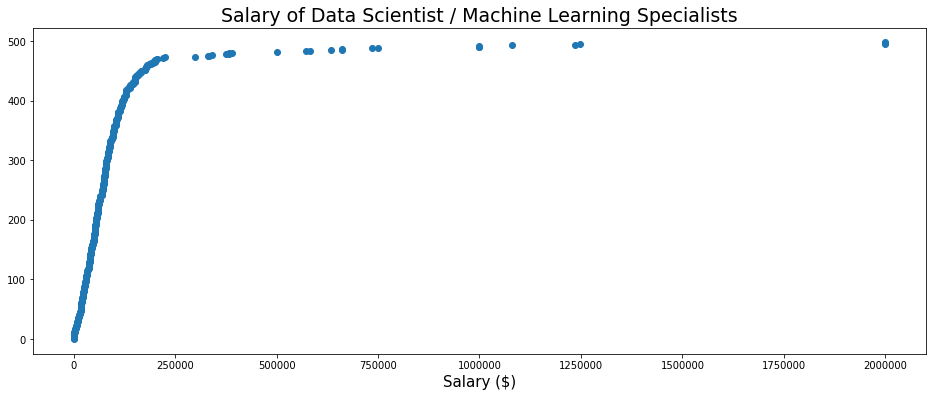

In [103]:
plt.figure(figsize = (16,6))

plt.scatter(np.sort(dm['ConvertedSalary'].values), range(dm.shape[0]))
plt.xlabel('Salary ($)', fontsize=15)
plt.title("Salary of Data Scientist / Machine Learning Specialists", fontsize=19)

plt.show()

* Most of the Data Scientist / Machine Learning Specialist getting salary **\$ 0 to \$2,50,000 **

In [104]:
temp1 = dm['OpenSource'].value_counts()
df1 = pd.DataFrame({'labels': temp1.index,'values': temp1.values})
df1.iplot(kind='pie',labels='labels',values='values', title='Open source contribution of Data Scientist / Machine Learning Specialists', hole = 0.7, color = ['#FF4040','#FAEBD7'])

* It's good to see that **Approx. 47 %** Data Scientist / Machine Learning Specialist are contributing to **open source projects**.

In [105]:
temp = dm["Country"].value_counts().head(15)
temp.iplot(kind='bar', xTitle = 'Country name', yTitle = "Count", title = 'Top countries having highest number of respondents who are Data Scientist / Machine Learning Specialists')

* Most of Data Scientist / Machine Learning Specialist who participated in StackOverflow are from USA followed by India, United Kingdom, Germany, France , Canada etc.

In [106]:
temp = pd.DataFrame(dm['Gender'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Gender (Data Scientist / Machine Learning Specialists)', hole = 0.5, color = ['#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125','#0000FF'])


* **Approx. 13 %** Data Scientist / Machine Learning Specialist who participated in the Survey was **Females**.

In [107]:
temp1 = pd.DataFrame(dm['LanguageWorkedWith'].dropna().str.split(';').tolist()).stack()
temp1 = temp1.value_counts().sort_values(ascending=False).head(15)
temp2 = pd.DataFrame(dm['LanguageDesireNextYear'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(15)
trace1 = go.Bar(
    y=temp1.index[::-1],
    x=temp1.values[::-1],
    orientation = 'h',
    #name = ''
)
trace2 = go.Bar(
    y=temp2.index[::-1],
    x=temp2.values[::-1],
    orientation = 'h',
    #name = ''
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('On which developers worked with', 'On which developers want to work in over the next year'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=500, width=1000, title='Most popular languages (Data Scientist / Machine Learning Specialists)', )
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* Most popular languages in which Data Scientist / Machine Learning Specialist are working or want to work is **Python** followed by **R**, **SQL**, **Bash/Shell**.
* **C++** and **Scala** are languages which are growing where Data Scientist / Machine Learning Specialist want to work.

In [108]:
temp1 = pd.DataFrame(dm['DatabaseWorkedWith'].dropna().str.split(';').tolist()).stack()
temp1 = temp1.value_counts().sort_values(ascending=False).head(20)
temp2 = pd.DataFrame(dm['DatabaseDesireNextYear'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(20)
trace1 = go.Bar(
    y=temp1.index[::-1],
    x=temp1.values[::-1],
    orientation = 'h',
    marker=dict(
        color=temp2.values[::-1],
        colorscale = 'red',
#         reversescale = True
    ),
    #name = ''
)
trace2 = go.Bar(
    y=temp2.index[::-1],
    x=temp2.values[::-1],
    orientation = 'h',
    #name = ''
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('On which developers worked with', 'On which developers want to work in over the next year'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
                          
fig['layout'].update(height=500, width=1100, title='Most popular Databases (Data Scientist / Machine Learning Specialists)', margin=dict(l=285,))
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* Top most  Databases in which Data Scientist / Machine Learning Specialist are working **MySQL** followed by **PostgreSQL**, **SQLServer**, **MongoDB**, **Apache Hive** etc.
* Top most  Databases in which Data Scientist / Machine Learning Specialist want to work **PostgreSQL** followed **MongoDB**, **MySQL**, **Elasticsearch**, **Apache Hive** etc.

In [109]:
temp1 = pd.DataFrame(dm['PlatformWorkedWith'].dropna().str.split(';').tolist()).stack()
temp1 = temp1.value_counts().sort_values(ascending=False).head(20)
temp2 = pd.DataFrame(dm['PlatformDesireNextYear'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(20)
trace1 = go.Bar(
    y=temp1.index[::-1],
    x=temp1.values[::-1],
    orientation = 'h',
    #name = ''
)
trace2 = go.Bar(
    y=temp2.index[::-1],
    x=temp2.values[::-1],
    orientation = 'h',
    #name = ''
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('On which developers worked with', 'On which developers want to work in over the next year'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
                          
fig['layout'].update(height=500, width=1100, title='Most popular platforms (Data Scientist / Machine Learning Specialists)', margin=dict(l=250,))
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* Most popular  Platforms on which Data Scientist / Machine Learning Specialist are working or want to wok is **Linux** followed by **AWS**. **Raspberry** Pie is the Platforn after these on which most  Databases in which Data Scientist / Machine Learning Specialist want to work.

In [110]:
temp1 = pd.DataFrame(dm['FrameworkWorkedWith'].dropna().str.split(';').tolist()).stack()
temp1 = temp1.value_counts().sort_values(ascending=False).head(20)
temp2 = pd.DataFrame(dm['FrameworkDesireNextYear'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(20)
trace1 = go.Bar(
    y=temp1.index[::-1],
    x=temp1.values[::-1],
    orientation = 'h',
    marker=dict(
        color=temp2.values[::-1],
        colorscale = 'red',
#         reversescale = True
    ),
    #name = ''
)
trace2 = go.Bar(
    y=temp2.index[::-1],
    x=temp2.values[::-1],
    orientation = 'h',
    #name = ''
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('On which developers worked with', 'On which developers want to work in over the next year'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
                          
fig['layout'].update(height=500, width=1100, title='Most popular Frameworks (Data Scientist / Machine Learning Specialists)', margin=dict(l=100,))
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* **Most popular Framworks** on which Data Scientist / Machine Learning Specialists are working or want to work is **TensorFlow** followed by **Spark**, **Torch/PyTorch**, **Hadoop**, **Django** etc.

In [111]:
temp = pd.DataFrame(dm['IDE'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125','#FF6103','#8EE5EE','#458B00','#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Top most used IDE  by Data Scientist / Machine Learning Specialists (%) ",
    xaxis=dict(
        title='IDE Name',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

* **Top most used IDE**  by Data Scientist / Machine Learning Specialist is **IPython / Jupyter** followed by **RStudio**, **Vim**, **PyCharm**, **Sublime Text**.

In [112]:
df = dm.set_index(['YearsCodingProf','ConvertedSalary']).LanguageWorkedWith.str.split(';', expand=True).stack().reset_index(['YearsCodingProf','ConvertedSalary'])
df.columns = ['YearsCodingProf','Salary','language']
df['YearsCodingProf'] = df['YearsCodingProf'].astype('category')
df['YearsCodingProf'].cat.reorder_categories(['0-2 years','3-5 years','6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
                                            '21-23 years',  '24-26 years','27-29 years', '30 or more years'], inplace=True)
gndr = ['Python','R','JavaScript','SQL','C++','Scala','Matlab','Julia']
fig = {
    'data': [
        {
            'x': df[df['language']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['YearsCodingProf'],
            'y': df[df['language']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['Salary'],
            'name': gr, 'mode': 'line',
        } for gr in gndr
    ],
    'layout': {
        'title' : 'Language V.S. years with Median Salary(Data Scientist/Machine Learning Specialists)',
        'xaxis': {'title': 'Years experience (Developers coded professionally)'},
        'yaxis': {'title': "Median Salary ($)"}
    }
}
py.iplot(fig)

In [113]:
df = dm.set_index(['YearsCodingProf','ConvertedSalary']).FrameworkWorkedWith.str.split(';', expand=True).stack().reset_index(['YearsCodingProf','ConvertedSalary'])
df.columns = ['YearsCodingProf','Salary','Framework']
df['YearsCodingProf'] = df['YearsCodingProf'].astype('category')
df['YearsCodingProf'].cat.reorder_categories(['0-2 years','3-5 years','6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
                                            '21-23 years', '30 or more years'], inplace=True)
gndr = ['Hadoop', 'Spark', 'Spring', 'TensorFlow', 'Torch/PyTorch',
       'Django', 'Angular', 'Cordova', 'Node.js', 'React',
       'Xamarin']
fig = {
    'data': [
        {
            'x': df[df['Framework']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['YearsCodingProf'],
            'y': df[df['Framework']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['Salary'],
            'name': gr, 'mode': 'line',
        } for gr in gndr
    ],
    'layout': {
        'title' : 'Frameworks V.S. years experience with Median Salary(Data Scientist/Machine Learning Specialists)',
        'xaxis': {'title': 'Years experience (Developers coded professionally)'},
        'yaxis': {'title': "Median Salary ($)"}
    }
}
py.iplot(fig)

In [114]:
df = dm.set_index(['YearsCodingProf','ConvertedSalary']).DatabaseWorkedWith.str.split(';', expand=True).stack().reset_index(['YearsCodingProf','ConvertedSalary'])
df.columns = ['YearsCodingProf','Salary','Database']
df['YearsCodingProf'] = df['YearsCodingProf'].astype('category')
df['YearsCodingProf'].cat.reorder_categories(['0-2 years','3-5 years','6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
                                            '21-23 years',  '24-26 years','27-29 years', '30 or more years'], inplace=True)
gndr = ['MySQL', 'PostgreSQL', 'Google BigQuery', 'SQL Server', 'SQLite',
       'Apache Hive', 'MongoDB', 'Oracle', 'Elasticsearch', 'Apache HBase',
       'Microsoft Azure (Tables, CosmosDB, SQL, etc)',
       'Google Cloud Storage', 'Cassandra', 'Redis', 'IBM Db2', 'Neo4j',
       'MariaDB', 'Amazon Redshift', 'Amazon DynamoDB',
       'Amazon RDS/Aurora', 'Memcached']
fig = {
    'data': [
        {
            'x': df[df['Database']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['YearsCodingProf'],
            'y': df[df['Database']==gr].groupby('YearsCodingProf').agg({'Salary' : 'median'}).sort_values(by = 'YearsCodingProf').reset_index()['Salary'],
            'name': gr, 'mode': 'line',
        } for gr in gndr
    ],
    'layout': {
        'title' : 'Database V.S. years experience with Median Salary(Data Scientist/Machine Learning Specialists)',
        'xaxis': {'title': 'Years experience (Developers coded professionally)'},
        'yaxis': {'title': "Median Salary ($)"}
    }
}
py.iplot(fig)

In [115]:
cnt_srs = stack_data["AIDangerous"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Number of people thinking about dangerous aspects of increasingly advanced AI technology (%)',
    margin=dict(
    l=500,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Most dangerous aspects of increasingly advanced AI technology in decreasing order :**
  * Approx. **29 %** peoples thinks that **Algorithms making important decisions**.
  * Approx. **28 %** peoples thinks **Artificial intelligence surpassing human intelligence**.
  * Aprox. **24 %** peoples thinks **Evolving definations of "fairness" in algorithmic V.S. human decisions**.
  * Approx. **20 %** peoples thinks **Increasing automation of jobs**.

In [116]:
cnt_srs = stack_data["AIInteresting"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Number of people thinking about exciting aspects of increasingly advanced AI technology (%)',
    margin=dict(
    l=500,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Most exciting aspects of increasingly advanced AI technology in decreasing order :**
  * Approx. **41 %** peoples thinks **Increasing automation of jobs**.
  * Approx. **23 %** peoples thinks that **Algorithms making important decisions**.
  * Approx. **23 %** peoples thinks **Artificial intelligence surpassing human intelligence**.
  * Aprox. **12 %** peoples thinks **Evolving definations of "fairness" in algorithmic V.S. human decisions**.
  

In [117]:
cnt_srs = stack_data["AIResponsible"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FF6103','#8EE5EE','#458B00','#FFF8DC'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='# people responsible to consider the ramifications of increasingly advanced AI (%)',
    margin=dict(
    l=300,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Whose responsibility is it to consider the ramifications of increasingly advanced AI technology :**
  * Approx. **48 %** peoples said that **The developers or the people creating the AI**.
  * Approx. **28 %** peoples said that **A governmental or other regulatory body**.
  * Approx. **17 %** peoples said that **Prominent industry leaders**.
  * Approx. **8 %** peoples said that **Nobody**.

In [118]:
cnt_srs = stack_data["AIFuture"].value_counts()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=(cnt_srs/cnt_srs.sum() * 100)[::-1],
    orientation = 'h',
    marker=dict(
        color=['#FF6103','#8EE5EE','#458B00','#FFF8DC'],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Number of People who think about the future of artificial intelligence (%)',
    margin=dict(
    l=500,
)
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Peoples take on the future of artificial intelligence :**
  * Approx.** 73 %** peoples said that **I'm excited about the possibilities more than worried about the dangers**.
  * Approx. **19 %** peoples said that **I'm worried about the dangers more than I'm excited about the possibilities**.
  * Approx. **8 %** peoples said that **I don't care about it, or I have't thought about it**.

### Below Analysis will be based on 98,855 developers

* Approx. 49 % developers did not disclose their Salay.
* Approx. 90 % developers codes as their hobby and the reasons for others 10 % developers can be for** getting good compnay or for higher package or better college placement**.... anything can be.
* Approx. 56 % Developers were contributed to open source projects.
* Out of 98,855 developers, which Country having highest number of respondents :
  * United States : 20,309 Developers
  * India : 13,721 Developers
  * Germany : 6,459 Developers
  * United Kingdom : 6,221 Developers
  * Canada : 3,393 Developers
* Approx. 74 % Developers are not students. They are working professional. Approx. 19 % Developers are full-time students and Approx. 7 % Developers are part-time students.
* **Employment Status of Developers :**
  * Employeed full-time : 74 % 
  * Independent Contractor, Freelancer or Self-employed : 9.74 %
  * Not employed but looking for work : 6.09 %
  * Employed part-time : 5.64 %
  * Not employeed and not looking for work : 4.33 %
  * Retired : 0.238 %
* **About highest level of formal education of Developers :**
  * Approx. 46 % Developers having Bachelor's degree
  * Approx. 23 % Developers having Master's degree
  * Approx. 12 % having some college/university study without earning a degree
  * Approx. 9 % having Secondary schools(eg. American high school etc.)
  * Approx 3 % having Associate degree
  * Approx. 2 % having other doctral degree (Phd. , Ed.D etc.)
  * Approx. 2 % having Primary/elementry school
  * Approx. 2 % having Professional degree (JD, MD etc.)
  * Approx. 1 % never completed any formal education.
* **Main field of study of Developers :** Most of the Developers **(63.7 %)** having **Computer Science, Computer engineering or Software engineering** field of study followed by **8.79 %** Developers having **Another engineering discipline(ex. civil, electrical or mechanical)** followed by **8.23 %** Developers having **Information Systems, Information Tecnology or system administration**. Only Approx 1 % Developers never declared their field of study.
* **Number of people are employed by the company or organization they work for :**
  * ** Approx. 10 %** people work in company or organization having **Fewer than 10 employees**.
  * ** Approx. 11 %** people work in company or organization having **10 to 19 employees**.
  * ** Approx. 24 %** people work in company or organization having **22 to 99 employees**.
  * ** Approx. 20 %** people work in company or organization having **100 to 499 employees**.
  * ** Approx. 7 %** people work in company or organization having **500 to 999 employees**.
  * ** Approx. 11 %** people work in company or organization having **1,000 to 4,999 employees**.
  * ** Approx. 4 %** people work in company or organization having **5,000 to 9,999 employees**.
  * ** Approx. 14 %** people work in company or organization having **10,000 or employees**.
* **Description of peoples who participated in the survey :**
  * Approx. **19 %** peoples called themselves **Back-end developers**.
  * Approx. **16 %** peoples called themselves **Full-stack developers**.
  * Approx. **13 %** peoples called themselves **Front-end developers**.
  * Approx. **7 %** peoples called themselves **Mobile developer**.
  * Approx. **6 %** peoples called themselves **Desktop or enterprise application developer**.
  * Approx. **6 %** peoples called themselves **Student**.
  * etc.
* **Satisfaction of peoples with their current job :**
  * **37.5 %** peoples are **Moderately Satisfied**.
  * **18 %** peoples are **Extremely Satisfied**.
  * **14.5 %** peoples are **Slightly Satisfied**.
  * **10.2 %** peoples are **Slightly dissatisfied**.
  * **9.12 %** peoples are **Moderately dissatified**.
  * **7.17 %** peoples are **Neither satisfied nor dissatisfied**.
  * **3.58 %** peoples are **Extremely dissatisfied**.
* **Satisfaction of peoples with their career thus far :**
  * **36.5 %** peoples are **Moderately Satisfied**.
  * **18.7 %** peoples are **Extremely Satisfied**.
  * **17.6 %** peoples are **Slightly Satisfied**.
  * **8.61 %** peoples are **Slightly dissatisfied**.
  * **8.26 %** peoples are **Neither satisfied nor dissatisfied**.
  * **6.88 %** peoples are **Moderately dissatified**.
  * **3.42 %** peoples are **Extremely dissatisfied**.
* **People thought about difficulty of survey :**
  * Approx. **37 %** peoples think survey was **Somewhat easy**.
  * Approx. **33 %** peoples think survey was **Very easy**.
  * Approx. **23 %** peoples think survey was **Neither easy nor difficult**.
  * Approx. **6 %** peoples think survey was **Somewhat difficult**.
  * Approx. **1 %** peoples think survey was **Very difficult**.
* **Peoples thinking about length of the survey :**
  * Approx **50 %** peoples thinks **The survey was an appropriate length.**
  * Approx. **49 %** peoples thinks **The survey was too long**.
  * Approx. **1 %** peoples thinks **The survey was too short**.
* **for how many years have peoples been coding :**
  * 3-5 years : Approx. 25 % peoples
  * 6-8 years : Approx. 21 % peoples
  * 9-11 years : Approx. 13 % peopels
  * 0-2 years : Approx. 11 % peoples
  * etc.
* **For how many years have peoples coded professionally  :**
  * 0-2 years : Approx. 30 % peoples
  * 3-5 years : Approx. 27 % peoples
  * 6-8 years : Approx. 15 % peoples
  * 9-11 years : Approx. 10 % peoples
  * etc.
* **Peoples hope to be doing in the next five years :**
  * ** Approx. 34 % peoples** : Working in a different or more specialized technical role than the one I'm in now.
  * **Approx. 26 % peoples ** : Working as a founder or co-founder of my own company.
  * **Approx. 19 % peoples** : Doing the same work.
  * **Approx. 10 % peoples** : Working as a product manager or project manager.
  * **Approx. 3 % peoples** : Working in a career completely unrelated to software development.
  * **Approx. 2 % peoples** : Retirement
* **Peoples current job-seeking status :**
  * **Approx 60 % peoples** : I am not actively looking, but i am open to new opportunities.
  * **Approx. 24 % peoples** :  I am not interested in new job opportunities.
  * **Approx. 16 % peoples** : I am actively looking for job.
* **When was the last time that peoples took a job with a new employer :**
  * **Approx. 35 % peoples** : Less than a year ago.
  * **Approx. 22 % peoples** : Between 1 and 2 year ago.
  * **Approx. 19 % peoples** : More than 4 year ago.
  * **Approx. 19 % peoples** : Between 2 and 4 years ago.
  * **Approx. 6 % peoples** : I've never had a job
* **Most popular communication tools :**
  * **Slack** used by  approx. 19 % developers.
  * ** Jira** used by approx. 15 % developers.
  * **Office / productivity suite** used by approx. 14 % developers.
  * **Stack overflow** used by only approx. 2 % developers.
* **JavaScript is the most popular language** on which developer worked and want to work in over the next year. **Python** is most demandable language on which developers want to work followed by **HTML, CSS** and **SQL** etc
* **MySQL is the most popular Database** on which developer worked and want to work in over the next year. **MongoDB** is most demandable Database on which developers want to work followed by **PostgreSQL, SQLServer, redis** and **ElasticsSearch** etc.
* **Linux is the most popular platform** on which developer worked and want to work in over the next year followed by  **Android** is most demandable Database on which developers want to work followed by **AWS, Raspberry pie** etc.
* **Node.js, Angular, React and .Net core are the most popular frameworks** on which developer worked and want to work in over the next year followed by  **Tansorflow** is most demandable Database on which developers want to work.
* **About StackOverflow :**
  * ** 69 % peoples** want to recommend StackOverflow **very likely** and **only 0.35 %** peoples **don't **want to recommend stackoverflow.
  * **Peoples visiting StackOverflow :**
    * **32.5 % peoples said** : Daily or almost daily
    * **31.1 % peoples said** : multiple times per day
    * **22.4 % peoples said** : A few times per week
    * **11.5 % peoples said** : A few times per month or weekly
  * **Respondents having StackOverflow account :**
    * **87.4 % Respondents said** : Yes
    * **8.73 % Respondents said **: No
    * **3.8 % Respondents said **: I'm not sure / I can't remember
  * **Participation on StackOverflow in Q&A :**
    * **Approx. 39 % Respondents said** : Less than once per month or monthly
    * **Approx. 23 % Respondents said** : A few times per month or weekly
    * **Approx. 17 % Respondents said** : I have never participated in Q&A on StackOverflow
    * **Approx. 12 % Respondents said** : A few times per week
    * **Approx. 6 % Respondents said** : Daily or almost daily
    * **Approx. 3 % Respondents said** : Multiple times per day
  * **Number of peoples visited StackOverflow jobs board :**
    * **51.4 % Respondents said** : YES
    * **35.8 % Respondents said** : No, I knew that StackOverflow had a jobs board but had never visit or used
    * **12.8 % Respondents said** : No, I didn't know that StackOverflow had a jobs board
  * **Up-to-date developer story on StackOverflow :**
    * **Approx. 37 % Respondents said** : No, I don't know what that is
    * **Approx. 24 % Respondents said** : No, I know what it is but i don't have one
    * **Approx. 23 % Respondents said** :  No, I have one but it's out of date
    * **Approx. 17 % Respondents said** : YES
  * **26.5 %** respondents said we will recommend StackOverflow jobs board **very likely**. **3.23 % **respondents said we **will not** recommend StackOverflow jobs board to anyone.
  * **Members of the Stack Overflow community :**
    * **55.5 % Respondents said** : YES
    * **22.4 % Respondents said** : NO
    * **22.2 % Respondents said** : I'm not sure
  * **Interest of developers in participating in the  hypothetical tools on Stack Overflow :**
    * **Rank 1 :** An employer or job review system **(Most participated tool)**
    * **Rank 2 :** An area for Q&A related to career growth
    * **Rank 3 :** A programming-oriented blog platform
    * **Rank 4 :** A peer mentoring system
    * **Rank 5 :** A private area for people new to programming **(Less participated tool)**
  * Majority of peoples who visit Stackoverflow **Multiple times per day**, **Daily or almost daily**, **A few times per week** or **A few times per month or weekly**	 recommending **very likely(10)**.
  * Most of the peoples who are visiting stackOverflow **Daily or almost daily** or **Multiple times per day** they know about **StackOverflow job board**.
  * Highest number of peoples who are visiting StackOverflow **Daily or almost daily**, **Multiple times per day** or **A few times per week	**, they don't know what is **Stackoverflow developer Story**.
  * Its good to see that who are visiting stackoverflow job board, out of these most of the peoples are recommending Stackoverflow job board very likely(10).
* **Top Reasons of upadating a CV  :**
  * **Approx. 42 % Respondents said** : My job status and my personal status changed.
  * **Approx. 14 % Respondents said** : A recruiter contacted me.
  * **Approx. 11 % Respondents said** : I had a negative experience or interaction at work.
  * **Approx. 11 % Respondents said** : A friend told me about a job opportunity.
  * **Approx. 10 % Respondents said** : I saw an employer's advertisement.
* **Types of Non-degree education in which people participated :**
  * **Approx. 29 % Respondents said** : Taught yourself a new language, framework or tool without taking a formal course.
  * **Approx. 16 % Respondents said** : Taken an online course in programming and software developement(eg. a MOOC)
  * **Approx. 14 % Respondents said** : Contributed to open source softwares
  * **Approx. 12 % Respondents said** : Received on-the-job training in software developement
  * **Approx. 9 % Respondents said** : Participated in hackathon
  * **Approx. 8 % Respondents said** : Participated in online coding compitition(eg. HackerRank, CodeChef or TopCoder)
  * **Approx. 6 % Respondents said** : Taken a part-time in-person course in programming or software development
  * **Approx. 5 % Respondents said** : Completed an industry certification program(eg. MCPD)
  * **Approx. 4 % Respondents said** :  Participated in a full-time developer training program or bootcamp
* **Top resources used by peoples who taught yourself without taking a course :**
  * **Approx. 22 % Respondents said** : The official documentation and/or standards for the technology
  * **Approx. 22 % Respondents said** : Q&A on the StackOverflow
  * **Approx. 13 % Respondents said** : A book or e-book from o'Reilly, Apress or a similar publisher
  * **Approx. 13 % Respondents said** : Online developer communities other than StackOverflow(eg, forums, listservs, IRC Channels etc)
  * **Approx. 13 % Respondents said** :The technology's online help system
  * **Approx. 5 % Respondents said** : A college/University computer  science or software engineering books
* **Top reasons who participated in online coding compitition or hackathon :**
  * **Approx. 26 % Respondents said** : Because I find it enjoyable
  * **Approx. 23 % Respondents said** : To improve my general technical skills or programming ability
  * **Approx. 18 % Respondents said** : To improve my knowledge of a specific programming language , framework or technology
  * **Approx. 10 % Respondents said** : To improve my ability to work on a team with others programmers
  * **Approx. 9 % Respondents said** : To build my professional network
  * **Approx. 7 % Respondents said** : To help me find a new job opportunities
  * **Approx. 6 % Respondents said** : to win prizes or cash awards
* ** About Ethics :**
  * **What peoples think about writing a code that is extremely unethical ? **
    * **58.5 % Respondents said** : NO
    * **36.6 % Respondents said** : Depend on what it is
    * **4.82 % Respondents said** : YES
  * **Do peoples want to report out unethical code in question ?**
    * **46.6 % Respondents said** : Depends on what it is
    * **35.7 % Respondents said** : Yes, but only within the company
    * **13.1 % Respondents said** : Yes, and publicaly
    * **4.62 % Respondents said** : No
  * **What peoples think who is most responsible for code that accomplishes something unethical?**
    * **57.5 % Respondents said** : Upper management at the company/organization
    * **22.8 % Respondents said** : The person who came up with idea 
    * **19.7 % Respondents said** : The developer who wrote it 
  * **There can be obligation to consider the ethical implications of the code that you write? **
    * **79.6 % Respondents said** : YES
    * **14.3 % Respondents said** : Unsure/I don't know
    * **6.08% Respondents said** : NO
* **Top most used IDE  by the developers :**
  * Approx. **12 %** developers using **Visual Studio Code**
  * Approx. **12 %** developers using Visual Studio 
  * Approx. **11 %** developers using **Notepad++**
  * Approx. **10 %** developers using **Sublime Text**
  * Approx. **9 %** developers using **Vim**
* **Top Used Operating system by the developers :**
  * Approx. **50 %** developers are using **Windows**
  * Approx. **27 % **developers are using **MacOS**
  * Approx. **23 %** developers are using **Linux-based**
  * **Only  0.2 %** developers are using **BSD/Unix**
* **Top version control system developers regularly use :**
  * Approx. **63 %** developers are using **Git**(**Most popular version control system**)
  * Approx. **12 %** developers are using **Subversion**
  * Approx. **8 %** developers are using **Team Foundation Version Control**
  * Approx **6 %** deveopers are using **Zip file back-ups**
* **Top methodologies developers have experience working in :**
  * Approx. **33 %** developers experience in **Agile**
  * Approx. **24 %** developers experience in **Scrum**
  * Approx. **14 %** developers experience in **Kanban**
  * Approx. **11 %** developers experience in **Pair programming**
* **About developers life style :**
  * **Developers wake up time on working days :**
    * **29.5 %** developers wake up time : **Between 7 am to 8 am**
    * **28.2 %** developers wake up time : **Between 6 am to 7 am**
    * **14.7 %** developers wake up time : **Between 8 am to 9 am**
    * **12.4 %** developers wake up time : **Between 5 am to 6 am**
    * etc.
  * **Developers spend their time in front of desktop or computer  on a typical day:**
    * **52.7 %** developers : **9-12 hours**
    * **30.6 %** developers : **5-8 hours**
    * **13.2 %** developers : **Over 12 hours**
    * **3.26 %** developers :** 1-4 hours**
    * **0.25 %** developers : **Less than 1 hour**
  * **Developers spend their time outside on a typical day :**
    * **38.6 %** developers : **1-2 hours**
    * **33.3 %** developers : **30-59 minutes**
    * **15.6 %** developers : **Less than 30 minutes**
    * **9.98 %** developers :** 3-4 hours**
    * **2.53 %** developers : **Over 4 hour**
  * **In a typical week, how many times Developers skip a meal in order to be more productive? **
    * **63.6 %** developers : **Never**
    * **25.2 %** developers : **1 - 2 times per week**
    * **5.98 %** developers : **3 - 4 times per week**
    * **5.15 %** developers : **Daily or almost every day**
  * **Top ergonomic furniture or devices developers use on a regular basis :**
    * **Approx. 38 %** developers use : **Ergonomic Keyboard or mouse**
    * **Approx. 37 %** developers use : **Standing desk**
    * **Approx. 16 %** developers use : **Wrist/hand supports or braces**
    * **Approx. 9 %** developers use : **Fatigue-relieving floor mat**
  * **In a typical week, how many times do developers exercise? **
    * **Approx. 38 %** developers said : **I don't typically excercise**
    * **Approx. 29 %** developers said : **1 - 2 times per week**
    * **Approx. 20 %** developers said : **3 - 4 times per week**
    * **Approx. 14 %** developers said : **Daily or almost every day**
* **Age of the developers of participated in the survey :**
  * **Apprx. 49 %** developers : **25 - 34 years old**
  * **Apprx. 24 %** developers : **18- 24 years old**
  * ** Apprx. 18 %** developers : **35 - 44 years old**
  * **Apprx. 5 %** developers : **45 - 54 years old**
  * **Apprx. 3 %** developers : **under 18 years old**
  * **Apprx. 1 %** developers : **55 - 64 years old**
  * **Apprx. 0.2 %** developers : **65 years or older**
* **Most **of the developers having **2 monitor** at their workstation followed by **1 monitor**.
* **Over the last year, how often have developers checked-in or committed code? **
  * ** 60. 2 % developers :** Multiples times per day **(This is interesting)**
  * ** 19.1 % developers :** Few times per week
  * ** 9.1 % developers : **Once a day
  * ** 6.89 % developers :** Weekly or few times per month
  * ** 3.23 % developers :** Less than once per month
  * ** Only 1.48 % developers :** Never
* **Gender wise Aanlysis :**
  * **Gender Analysis who participated in the survey :**
    * 91.7 % developers : **Male**
    * 6.76 % developers : **Female**
    * 0.91 % developers : **Non-binary, genderqueer or gender non-conforming**
    * 0.65 % developers : **Transgender**
  * **Sexual Orientation of developers :**
    * 91.6 % developers : **Straight or heterosexual**
    * 4.21 % developers : **Bisexual or Queer**
    * 2.31 % developers : **Gay or Lesbian**
    * 1.86 % developers : **A sexual**
  * **Top DevType with Median Salary(Male V.S. Female) : **
    * Female having more median salary than Male in these DevType :
      * **DevOps specialist**
      * **C-suite executive (CEO, CTO etc.)**
      * **Full Stack developer**
      * **Educator or acadmic research**
  * **Top Countries where respondents are > 500 with Median Salary(Male V.S. Female) :**
    * Female having more median salary than Male : **China**
    * Female and Male having equal median salary : **Brazil**
* **Developers Salary Exploration :**
  * **Developers Annual Salary :** 
    * **Overall Developers Annual Salary :**  **Minimum Salary =** \$ 0,  **Maximum Salary =**  \$ 20,00,000, **Mean Salary =** \$ 95,780.86, **Median Salary =** \$ 55,075 
    * **Male Developers Annual Salary :**  **Minimum Salary =** \$ 0,  **Maximum Salary =**  \$ 20,00,000, **Mean Salary =** \$ 96,477.07 , **Median Salary =** \$ 56,100 
    * **Female Developers Annual Salary :**  **Minimum Salary =** \$ 0,  **Maximum Salary =**  \$ 20,00,000, **Mean Salary =** \$ 88,251.29, **Median Salary =** \$ 54,336 
  * **Top 5 countries where respondents are > 500 with highest Median Salary in USD :**
    * **United states :** \$ 100K
    * **Switzerland :** \$ 93,842
    * **Israel :** \$ 90,642
    * **Norway :** \$ 82,890
    * **Denmark :** \$ 82,836
  * **Top 5 DevType with highest median salary in USD :**
    * **Engineering manager :** \$ 88,573
    * **DevOps specialist :** \$ 72,469
    * **C-suite executive(CEO, CTO) :** \$ 69,244
    * **Product manager : **\$ 63,174
    * **Data scientist or machine learning specialist :** \$ 60,000
     * Thea bove Top 5 Deytype with highest median salary  are same in **India**, **USA** and **Globally**. Only Devops specialist and C-suite executive are interchangable but in india  and USA are same.
* **About AdBlooker :**
  * **AdBlocker software installed or not ? **
    * **72.3 % respondents said :**  YES
    * **22.5 % respondents said **: NO
    * **5.13 % respondents said :** I'm not sure / i don't know
  * **In past month how many peoples disable theor AdBlocker ?**
    * **70.7 % respondents said :**  YES
    * **24.1 % respondents said **: NO
    * **5.26 % respondents said :** I'm not sure / i don't know
  * **Top Reasons of disabling the AdBlocker :**
    * Approx. **32 %** respondents said : **The website i was visiting forced me to disable it to access their content**
    * Approx. **24 %** respondents said :** I wanted to support the website i was visiting by viewing their ads**
    * Approx. **21 %** respondents said : **The ad-blocking software was causing issues on a website**
    * Approx. **18 %** respondents said : **The website I was visiting asked me to disable it**
    * Approx. **2 %** respondents said : **I wanted to view a specific advertisement**
    * Approx. **2 %** respondents said : **The website i was visiting has interesting ads**
  * **Online advertising can be valuable when it is relevant to me :**
    * Approx. **40 %** respondents said : **Somewhat agree**
    * Approx. **18 %** respondents said : **Neither agree nor disagree**
    * Approx. **16 %** respondents said : **Strongly Agree**
    * Approx. **14 %** respondents said : **Somewhat disagree**
    * Approx. **12 %** respondents said : **Strongly disagree**
  * **I enjoy seeing online updates from companies that I like :**
    * Approx. **37 %** respondents said : **Somewhat agree**
    * Approx. **24 %** respondents said : **Neither agree nor disagree**
    * Approx. **16 %** respondents said : **Strongly Agree**
    * Approx. **13 %** respondents said : **Somewhat disagree**
    * Approx. **10 %** respondents said : **Strongly disagree**
  * **I fundamentally dislike the concept of advertising :**
    * Approx. **30 %** respondents said : **Neither agree nor disagree**
    * Approx. **22 %** respondents said : **Somewhat agree**
    * Approx. **20 %** respondents said : **Somewhat disagree**
    * Approx. **19 %** respondents said : **Strongly Agree**
    * Approx. **10 %** respondents said : **Strongly disagree**
  * **Ad's Priority conclusion from respondents :**
    * **Rank 1 :** The advertisement is relevant to me **(Most Important)**
    * ** Rank 2 :** The advertisement provides useful information
    * **Rank 3 :** The advertisement seems trustworthy
    * **Rank 4 :** The advertisement is honest about its goals
    * **Rank 5 :** The advertisement is from a company that I like
    * **Rank 6 :** The advertisement avoids fluffy or vague language
    * **Rank 7 :** The advertisement offers something of value, like a free trial **(Least Important)**
* **Feeling  towords Fellow developers :**
   * **I feel a sense of kinship or connection to other developers :**
     * **Approx. 54 %** developers said : **Agree**
     * **Approx. 22 %** developers said : **Neither Agree or nor Disagree**
     * **Approx. 17 %** developers said : **Strongly agree**
     * **Approx. 6 %** developers said : **Disagree**
     * **Approx. 2 %** developers said : **Strongly disagree**
   *  **I think of myself as competing with my peers  :**
     * **Approx. 27 %** developers said : **Agree**
     * **Approx. 26 %** developers said : **Neither Agree or nor Disagree**
     * **Approx. 26 %** developers said : **Disagree**
     * **Approx. 13 %** developers said :  **Strongly disagree**
     * **Approx. 8 %** developers said : **Strongly agree**
   *  **I'm not as good at programming as most of my peers  :**
     * **Approx. 34 %** developers said : **Disagree**
     * **Approx. 25 %** developers said : **Neither Agree or nor Disagree**
     * **Approx. 23 %** developers said : **Strongly disagree**
     * **Approx. 14 %** developers said : **Agree**
     * **Approx. 4 %** developers said : **Strongly agree**
* **Time to get a full-time job offer after doing developer training program or bootcamp :**
    * **Approx. 45 %** respondents said : **I already had a full time job as a developer when i began the program**
    * **Approx. 16 %** respondents said : **Immediately after graduating** 
    * **Approx. 10 %** respondents said : **One to three month**
    * **Approx. 9 %** respondents said : **I haven't gotten a developer job**
    * **Approx. 5 %** respondents said : **Less than a month 4 to 6 month**
    * **Approx. 4 %** respondents said : **6 month to a year**
    * **Approx. 3 %** respondents said : **Longer than a year**
* **Data Scientist / Machine Learning Specialists :**
  * Most of the Data Scientist / Machine Learning Specialist getting salary **\$ 0 to \$2,50,000 **.
  * It's good to see that **Approx. 47 %** Data Scientist / Machine Learning Specialist are contributing to **open source projects**.
  * Most of Data Scientist / Machine Learning Specialist who participated in StackOverflow are from USA followed by India, United Kingdom, Germany, France , Canada etc.
  * **Approx. 13 %** Data Scientist / Machine Learning Specialists who participated in the Survey was **Females**.
  * Most popular languages in which Data Scientist / Machine Learning Specialists are working or want to work is **Python** followed by **R**, **SQL**, **Bash/Shell**.
  * **C++** and **Scala** are languages which are growing where Data Scientist / Machine Learning Specialists want to work.
  * Top most  Databases in which Data Scientist / Machine Learning Specialists are working **MySQL** followed by **PostgreSQL**, **SQLServer**, **MongoDB**, **Apache Hive** etc.
  * Top most  Databases in which Data Scientist / Machine Learning Specialists want to work **PostgreSQL** followed **MongoDB**, **MySQL**, **Elasticsearch**, **Apache Hive** etc.
  * Most popular  Platforms on which Data Scientist / Machine Learning Specialists are working or want to wok is **Linux** followed by **AWS**. **Raspberry** Pie is the Platforn after these on which most  Databases in which Data Scientist / Machine Learning Specialists want to work.
  * **Most popular Framworks** on which Data Scientist / Machine Learning Specialists are working or want to work is **TensorFlow** followed by **Spark**, **Torch/PyTorch**, **Hadoop**, **Django** etc.
  * **Top most used IDE**  by Data Scientist / Machine Learning Specialist is **IPython / Jupyter** followed by **RStudio**, **Vim**, **PyCharm**, **Sublime Text**.
* **About Artificial Intelligence :**
  * **Most dangerous aspects of increasingly advanced AI technology in decreasing order :**
    * Approx. **29 %** peoples thinks that **Algorithms making important decisions**.
    * Approx. **28 %** peoples thinks **Artificial intelligence surpassing human intelligence**.
    * Aprox. **24 %** peoples thinks **Evolving definations of "fairness" in algorithmic V.S. human decisions**.
    * Approx. **20 %** peoples thinks **Increasing automation of jobs**.
 * **Most exciting aspects of increasingly advanced AI technology in decreasing order :**
    * Approx. **41 %** peoples thinks **Increasing automation of jobs**.
    * Approx. **23 %** peoples thinks that **Algorithms making important decisions**.
    * Approx. **23 %** peoples thinks **Artificial intelligence surpassing human intelligence**.
    * Aprox. **12 %** peoples thinks **Evolving definations of "fairness" in algorithmic V.S. human decisions**.
  * **Whose responsibility is it to consider the ramifications of increasingly advanced AI technology :**
    * Approx. **48 %** peoples said that **The developers or the people creating the AI**.
    * Approx. **28 %** peoples said that **A governmental or other regulatory body**.
    * Approx. **17 %** peoples said that **Prominent industry leaders**.
    * Approx. **8 %** peoples said that **Nobody**.
  * **Peoples take on the future of artificial intelligence :**
    * Approx.** 73 %** peoples said that **I'm excited about the possibilities more than worried about the dangers**.
    * Approx. **19 %** peoples said that **I'm worried about the dangers more than I'm excited about the possibilities**.
    * Approx. **8 %** peoples said that **I don't care about it, or I have't thought about it**.